# ---Statistics Reference for Data Analysis---

1. Fundamental Variability Functions
2. Percentiles and Boxplots
3. Frequency Table and Histograms
4. Bar Charts with Binary/Categorical Data
5. Correlation and Heatmaps
6. Exploring Two or More Variables
7. Data and Sampling Distributions
8. Statistical Experiments and Significance Testing
9. Regression and Prediction
10. Classification Methods
11. Evaluating Classification Models
12. Statistical Machine Learning
13. Unsupervised Machine Learning
14. SUMMARY

In [1]:
import os
os.chdir("C:\\Users\\Monarch Eubanks\\Desktop\\") #Insert file path

Import required packages

In [4]:
%matplotlib inline

from pathlib import Path

from collections import defaultdict
from itertools import product
import datetime

import pandas as pd
import numpy as np
import random
import math

from scipy.stats import trim_mean
from scipy import stats
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal

from statsmodels import robust
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power
from statsmodels.stats.outliers_influence import OLSInfluence

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

from pygam import LinearGAM, s, l
from pygam.datasets import wage


import wquantiles

import prince

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score

from dmba import stepwise_selection
from dmba import AIC_score
from dmba import classificationSummary
from dmba import plotDecisionTree, textDecisionTree

from xgboost import XGBClassifier

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.patches import Ellipse
from matplotlib import cm 
from matplotlib.colors import from_levels_and_colors

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

In [5]:
AIRLINE_STATS_CSV = 'airline_stats.csv'
AIRPORT_DELAYS_CSV = 'dfw_airline.csv'
CLICK_RATE_CSV = "click_rates.csv"
FOUR_SESSIONS_CSV = "four_sessions.csv"
FULL_TRAIN_SET_CSV = "full_train_set.csv"
HOUSE_CSV = "house_sales.csv"
HOUSE_TASKS_CSV ="housetasks.csv"
KC_TAX_CSV = 'kc_tax.csv.gz'
LC_LOANS_CSV = 'lc_loans.csv'
LOAN_DATA_CSV = "loan_data.csv"
LOANS_INCOME_CSV = "loans_income.csv"
LOAN200_CSV = "loan200.csv"
LOAN3000_CSV = "loan3000.csv"
LUNG_CSV = "LungDisease.csv"
SP500_DATA_CSV = 'sp500_data.csv.gz'
SP500_SECTORS_CSV = 'sp500_sectors.csv'
STATE_CSV = 'state.csv'
WEB_PAGE_DATA_CSV = "web_page_data.csv"

In [6]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# 1 - Variability Functions

In [9]:
"""STATE TABLE"""

state = pd.read_csv(STATE_CSV)
print(state.head(3))

     State  Population  Murder.Rate Abbreviation
0  Alabama     4779736          5.7           AL
1   Alaska      710231          5.6           AK
2  Arizona     6392017          4.7           AZ


In [10]:
"""All functions are from STATE TABLE"""

print('Mean: ' + str(state['Population'].mean())) #The population mean
print('Mean: ' + str(state.Population.mean())) #Alternative nomeclature
print('Trim Mean: ' + str(trim_mean(state['Population'], 0.1))) #Trims the left and rightmost 10% percentiles
print('Median: ' + str(state['Population'].median())) #The population median
print('Standard Deviation: ' + str(state['Population'].std())) #The population median
print('Weighted Mean: ' + str(np.average(state['Murder.Rate'], weights=state['Population']))) #Mean weighted by population
print('Weighted Median: ' + str(wquantiles.median(state['Murder.Rate'], weights=state['Population'])))
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25)) #IQR - Internal Quantile Range
print(robust.scale.mad(state['Population'])) #Median Absolute Deviation

Mean: 6162876.3
Mean: 6162876.3
Trim Mean: 4783697.125
Median: 4436369.5
Standard Deviation: 6848235.347401142
Weighted Mean: 4.445833981123393
Weighted Median: 4.4
4847308.0
3849876.1459979336


# 2 - Percentiles and Boxplots

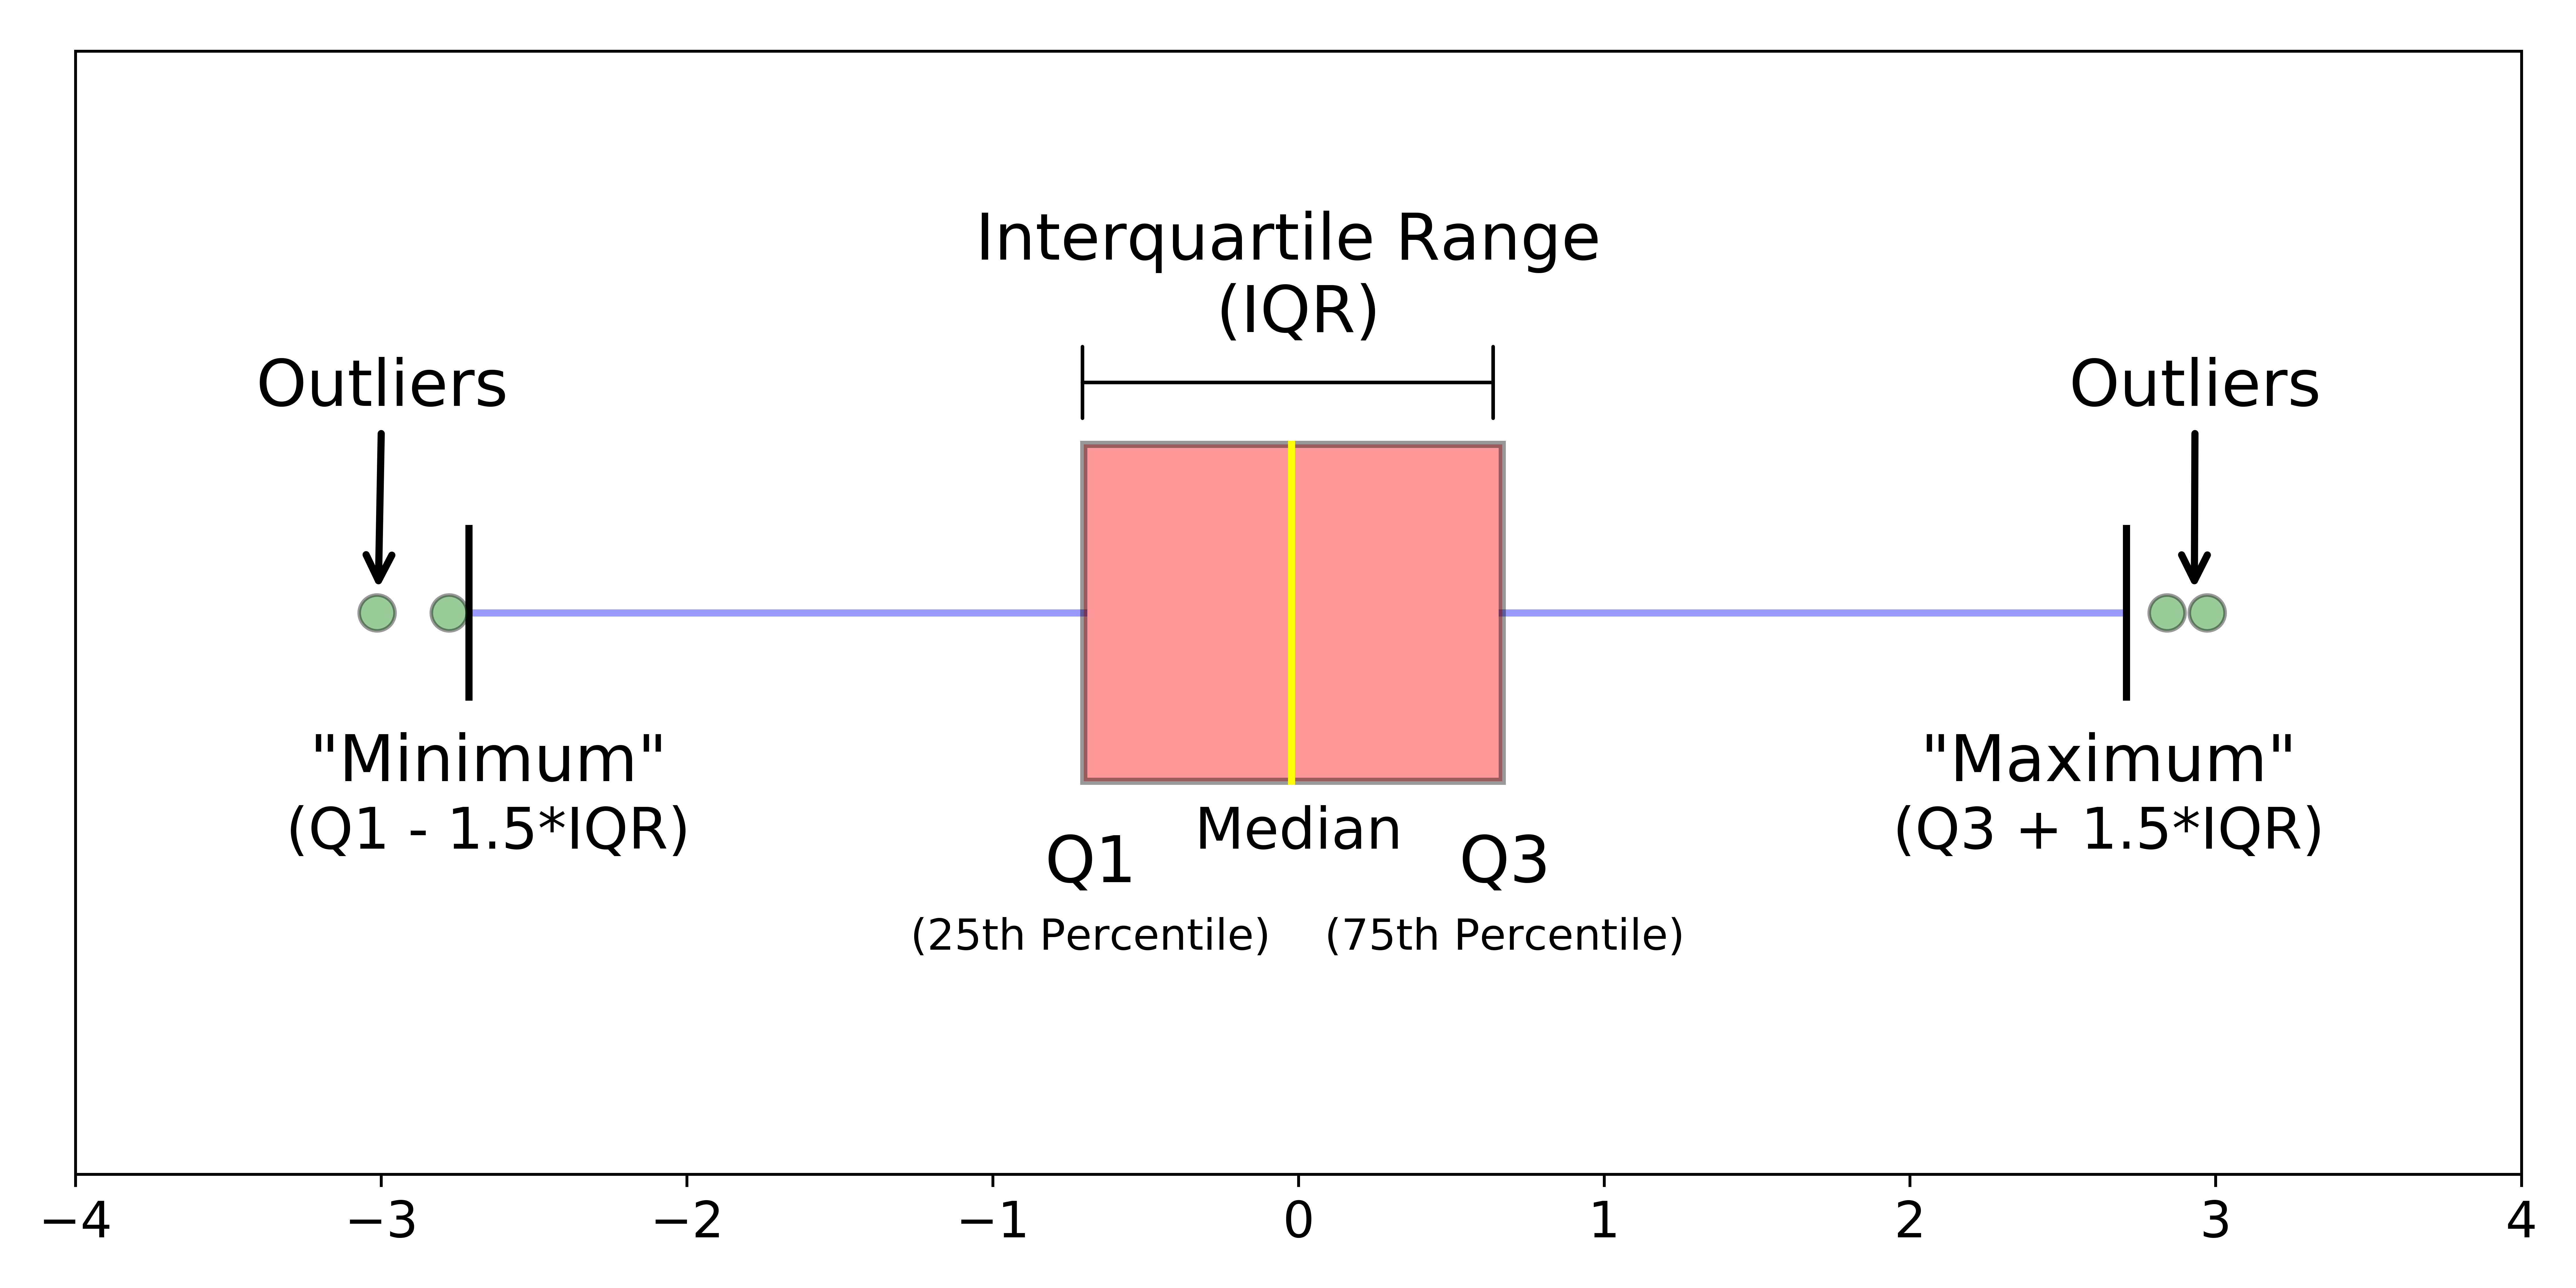

 ## 2A  - How to Display Percentiles (aka Quantiles)

In [6]:
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


NOTE: The below uses an f-string. Anything within brackets {} will be replaced and converted into a string value.

In [7]:
# Table 1.4
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


## 2B - How to Create a Boxplot

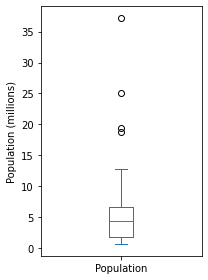

In [11]:
ax = (state['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show()

# 3 - Frequency Table and Histograms

## 3A - How to Create a Frequency Table

The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table. The (x, y) values are the lower and upper ranges of the bin.

In [12]:
binnedPopulation = pd.cut(state['Population'], 10)
print(binnedPopulation.value_counts())

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64


## 3B - How to Display Groups in a Frequency Table

In [16]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df = pd.concat([state, binnedPopulation], axis=1) #combine DataFrames or Series by either rows or columns.
df = df.sort_values(by='Population')

groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

## 3C - How to Create a Histogram

This states the frequency of one variable.

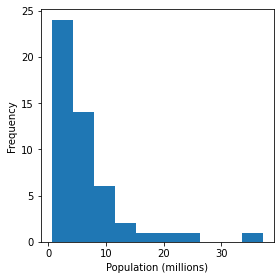

In [31]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show()

## 3D - How to Create a Density Plot

Density is an alternative to histograms that can provide more insight into the distribution of the data points. Use the argument `bw_method` to control the smoothness of the density curve.

This also states the frequency of one variable

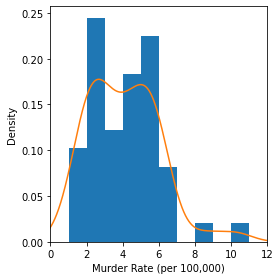

In [19]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1,12), figsize=(4, 4))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

plt.tight_layout()
plt.show()

# 4 - Bar Charts with Binary/Categorical Data

In [21]:
# Table 1-6
dfw = pd.read_csv(AIRPORT_DELAYS_CSV)
print(100 * dfw / dfw.values.sum()) #percentage delays by column value

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


## 4A - How to Create a Bar Chart

This compares frequency of more than one variable

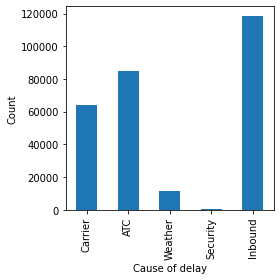

In [22]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False) #Transpose flips the axis of the array
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

# 5 - Correlation and Heatmaps

To compute Pearson's correlation coefficient, we multiply deviations from the mean for variable 1 times those of variable 2, and divide the product of teh standard deviation.

+/- 1 is strongly correlated; 0 is no correlation

In [38]:
sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV)
sp500_sym.head(3)

sector sector_label                             sub_sector  \
0  information_technology   Technology  data_processing_&_outsourced_services   
1  information_technology   Technology                       systems_software   
2  information_technology   Technology                       systems_software   

  symbol  
0    ADS  
1     CA  
2   MSFT

In [35]:
sp500_px.head(3)

Unnamed: 0  ADS        CA      MSFT  RHT  CTSH       CSC       EMC  \
0  1993-01-29  0.0  0.060124 -0.022100  0.0   0.0  0.018897  0.007368   
1  1993-02-01  0.0 -0.180389  0.027621  0.0   0.0  0.018889  0.018425   
2  1993-02-02  0.0 -0.120257  0.035900  0.0   0.0 -0.075573  0.029482   

        IBM       XRX  ...  WAT  ALXN     AMGN  BXLT     BIIB     CELG  \
0  0.092165  0.259140  ...  0.0   0.0  0.34716   0.0  0.04167  0.00000   
1  0.115207 -0.100775  ...  0.0   0.0 -0.23144   0.0  0.00000 -0.01041   
2 -0.023041  0.028796  ...  0.0   0.0 -0.11572   0.0  0.00000  0.00000   

       GILD  REGN   VRTX  HSIC  
0  0.015564  1.75  0.125   0.0  
1  0.007782  1.25  0.125   0.0  
2 -0.007792 -0.25  0.000   0.0  

[3 rows x 518 columns]

NOTE:

loc is label-based, which means that you have to specify rows and columns based on their row and column labels. iloc is integer index based, so you have to specify rows and columns by their integer index.

In [39]:
# Table 1-7
# Determine telecommunications symbols
sp500_px = sp500_px.set_index('Unnamed: 0') #Set index
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol'] #filter sector; get list symbols

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
#telecom.corr()
print(telecom.head(3))

                   T       CTL       FTR        VZ      LVLT
Unnamed: 0                                                  
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000


## 5A - How to Plot a Correlation Table

In [26]:
"""You can see that Verizion (VZ) and ATT (T) are correlated"""
telecom.corr()

T       CTL       FTR        VZ      LVLT
T     1.000000  0.474683  0.327767  0.677612  0.278626
CTL   0.474683  1.000000  0.419757  0.416604  0.286665
FTR   0.327767  0.419757  1.000000  0.287386  0.260068
VZ    0.677612  0.416604  0.287386  1.000000  0.242199
LVLT  0.278626  0.286665  0.260068  0.242199  1.000000

In [40]:
"""Correlation between ETFs"""
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head(3))

                 XLI       QQQ       SPY       DIA       GLD    VXX   USO  \
Unnamed: 0                                                                  
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.00   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.25   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.07   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
Unnamed: 0                                                               
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   

                 XLV       XLP       XLF       XLK  
Unnamed: 0                                          
2012-07-02 -0.009529  0.313499  0.018999  0.075668  
2012-07-03  0.000000  0.129087  0.104492  0.236462  
2012-07-05 -0.142955 -0.073766 

Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

In [41]:
etfs.corr().head(3)

XLI       QQQ       SPY       DIA       GLD       VXX       USO  \
XLI  1.000000  0.785865  0.888865  0.869680  0.056554 -0.468196  0.236881   
QQQ  0.785865  1.000000  0.908995  0.834440  0.043553 -0.470555  0.199492   
SPY  0.888865  0.908995  1.000000  0.953726  0.078722 -0.547074  0.272069   

          IWM       XLE       XLY       XLU       XLB       XTL       XLV  \
XLI  0.782380  0.650054  0.798080  0.380809  0.784144  0.374000  0.663022   
QQQ  0.810158  0.560044  0.839701  0.346667  0.713463  0.421790  0.775392   
SPY  0.833937  0.713300  0.887028  0.481928  0.826053  0.406181  0.811269   

          XLP       XLF       XLK  
XLI  0.600424  0.787340  0.777773  
QQQ  0.614806  0.752771  0.945126  
SPY  0.744466  0.883616  0.886588

## 5B - How to Plot a Heatmap

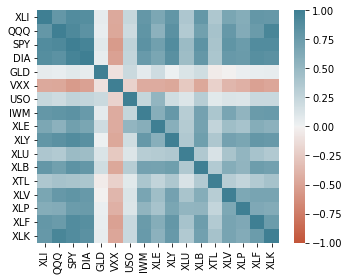

In [42]:
"""Correlation between ETF returns"""

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

## 5C - How to Plot an Ellipse Table

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

The orientation of the ellipse indicates whether two variables are positively correleated (ellipse is pointed
to the top right) or negatively correlated (ellipse is pointed to the top left). The shading and width  of the 
ellipse indicate the strength of the association: thinner and darker correspond to stronger relationships.

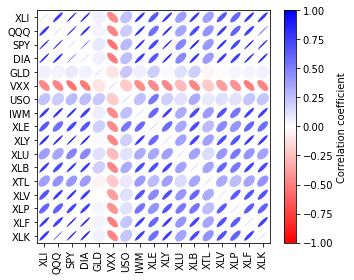

In [44]:
"""Correlation between ETF returns"""

from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

## 5D -  How to Plot a ScatterPlot

Simple scatterplots are supported by _pandas_. Specifying the marker as `$\u25EF$` uses an open circle for each point.

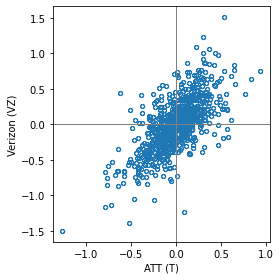

In [45]:
"""Scatterplot of correlation between returns for ATT and Verizon"""
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

# 6 - Exploring Two or More Variables
Load the kc_tax dataset and filter based on a variety of criteria

Scatterplots are fine when there is a relatively small number of data values. The plot of stock returns in the scatterplot example above involves only about 750 points. For data sets with hundreds of thousands or millions or values, a scatterplot will be too dense, so we need a different way to visualize the relationship.

In [46]:
kc_tax = pd.read_csv(KC_TAX_CSV )
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax0.shape)
kc_tax.head(3)

(432693, 3)


TaxAssessedValue  SqFtTotLiving  ZipCode
0               NaN           1730  98117.0
1          206000.0           1870  98002.0
2          303000.0           1530  98166.0

If the number of data points gets large, scatter plots will no longer be meaningful. Here methods that visualize densities are more useful. The `hexbin` method for _pandas_ data frames is one powerful approach.

Look at the example below:

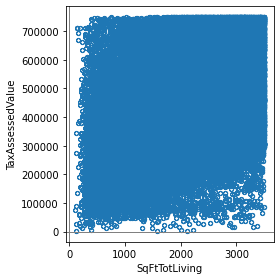

In [47]:
ax = kc_tax0.plot.scatter(x='SqFtTotLiving', y='TaxAssessedValue', figsize=(4, 4), marker='$\u25EF$')
ax.set_xlabel('SqFtTotLiving')
ax.set_ylabel('TaxAssessedValue')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

## 6A - How to Plot Hexagon Binning

Rather than plotting points, which would appear as a dark cloud like above, we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. 

In this chart, the postiive relationship between the square feet and the tax-assessed value is clear. An interesting feature is the hint of additional bands above the main (darkest) band at the bottom, indicating homes that have the same square footage as those in the main band but a higher tax-assessed value.

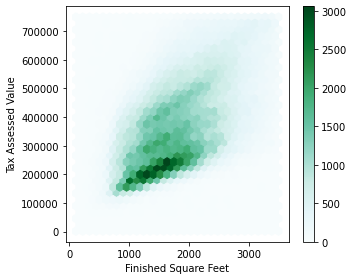

In [48]:
"""Hexagon Binning Plot of Tax Assessed Value vs SqFt Total of Living"""
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

## 6B - How to Creat a Contour Plot

Heat maps, hexagonal binning, and contour plots all give a visual representation of a two-dimensional density.

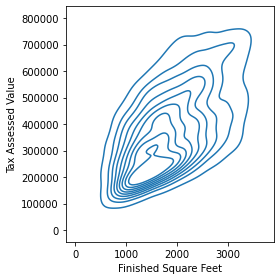

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

In [50]:
lc_loans = pd.read_csv(LC_LOANS_CSV)
lc_loans.head()

status grade
0   Fully Paid     B
1  Charged Off     C
2   Fully Paid     C
3   Fully Paid     C
4      Current     B

## 6C - How to Create a Pivot Table

In [51]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [52]:
"""The below is the same pivot table as above but uses percentages"""
df = crosstab.copy().loc['A':'G',:]
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


## 6D - How to Create a Boxplot and Violot Plot for Two Variables. 

In [54]:
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)
airline_stats.head(3)

pct_carrier_delay  pct_atc_delay  pct_weather_delay   airline
0           8.153226       1.971774           0.762097  American
1           5.959924       3.706107           1.585878  American
2           7.157270       2.706231           2.026706  American

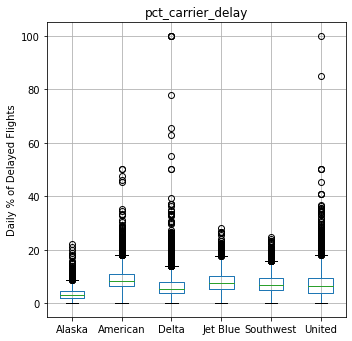

In [55]:
"""Boxplot"""
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

plt.tight_layout()
plt.show()

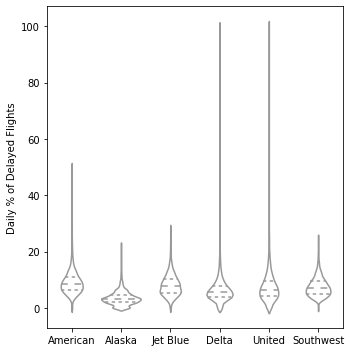

In [56]:
"""Violin Plot"""
fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

plt.tight_layout()
plt.show()

## 6E - How to Plot Multiple Variables

NOTE: The isin() method checks if the Dataframe contains the specified value(s).

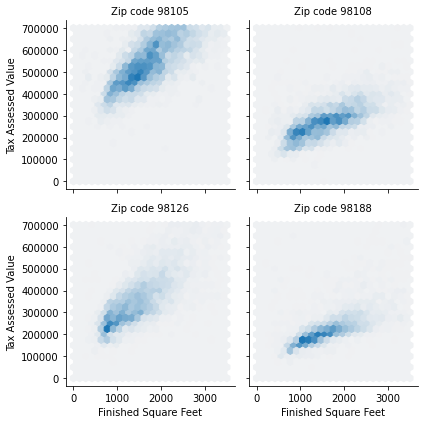

In [57]:
"""NOTE This is same info as previous scatterplot. It shows a better story of the data."""

zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]
kc_tax_zip

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()

# 7 - Data and Sampling Distributions

NOTE:

.sample() - randomly retreives a specified quantity of samples from a data set

resample() - randomly shuffles and repeats values shown within data set

In [59]:
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns') #convert x to columns

#Randomly pull data points from the total set
sample_data = pd.DataFrame({'income': loans_income.sample(1000), 'type': 'Data'})

#Randomly take 5 points from the data set and calculate the mean. Repeat 1000 times
sample_mean_05 = pd.DataFrame({'income': [loans_income.sample(5).mean() for i in range(1000)],'type': 'Mean of 5'})

sample_mean_20 = pd.DataFrame({'income': [loans_income.sample(20).mean() for i in range(1000)],'type': 'Mean of 20'})

sample_mean_1000 = pd.DataFrame({'income': [loans_income.sample(1000).mean() for i in range(1000)],'type': 'Mean of 1000'})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20, sample_mean_1000])
print(results.head(3))

sample_data.shape

         income  type
33549   98000.0  Data
80      86000.0  Data
23696  113400.0  Data


(1000, 2)

Notice how the data become more narrow as you increase the mean size.

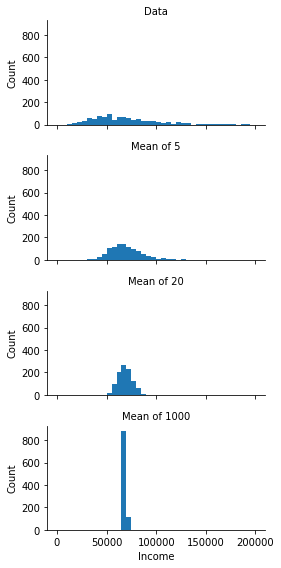

In [60]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## 7A - The Bootstrap

A method to estimate the sampling distribuation of a statistic or model parameters; draw additional samples, with replacement, form the sample itself and recalculate the statistic or model for each resample. This is called bootstrap.

Bootstrapping helps identify variability in sample but it does not compensate for low sample size.

Procedure: 
1. Draw a sample value, record it, and then replace it
2. Repeat n times.
3. Recoard the mean of the n resample values.
4. Repeat steps 1-3 R times.
5. Use the R results to:

    A. Calculate their standard devation
    
    B. Produce a histogram or boxplot
    
    C. Find a confidence interval
    

In [61]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income) #from Scikit-learn
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')
print(f'length: {len(loans_income)}')
print(loans_income.head(10))

Bootstrap Statistics:
original: 62000.0
bias: -67.93349999999919
std. error: 206.51699711609174
length: 50000
0     67000
1     52000
2    100000
3     78762
4     37041
5     33000
6     38500
7     85000
8    120000
9     57000
Name: x, dtype: int64


In [70]:
"""Try it yourself: You will notice the values will change every time the code is ran."""

sample10 = loans_income.head(10)
sample10 = resample(sample10, n_samples=10, replace=True)
sample10.head(10)

5     33000
0     67000
6     38500
8    120000
6     38500
8    120000
4     37041
3     78762
0     67000
1     52000
Name: x, dtype: int64

## 7B - Confidence Intervals

The typical way to present estimates as an interval range.

One way to think of a 90% Confidence Interval (CI):
It is a interval that encloses the central 90% of the boostrap sampling distribution. More generally, a 90% confidence interval aroudn the sample estimate should, on average, contain similiar sample estimates 90% of the time. 

Procedure:
1. Draw a randoms sample of size n with replacement from the data (a resample)
2. Record the statistic of interest for the resample
3. Repeat steps 1-2 many (R) times.
4. For an x% confidence interval, trim [(100-x) /2]% for the R resample results from either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval. 

In [71]:
print(loans_income.mean())
np.random.seed(seed=3)  #still randomized, but this gives you the same result after the randomization.


sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)
print(sample20)

68760.51844
55734.1
35437     54000
16296     25000
23122     75000
9436      56000
11959    116262
3313      85000
49651     13000
2837      60000
46465     54000
26004     30000
42728    160000
26264     83300
17830     34000
8283      47000
24455     24000
24094     31000
12649     26000
46661     25000
37609     21120
10439     95000
Name: x, dtype: int64


In [72]:
print('the population mean is: ' + str(loans_income.mean()))
np.random.seed(seed=4)  
sample20 = resample(loans_income, n_samples=20, replace=False)
print('The resample mean is: ' + str(sample20.mean()))

the population mean is: 68760.51844
The resample mean is: 57202.65


the population mean is: 68760.51844
The resample mean is: 55734.1


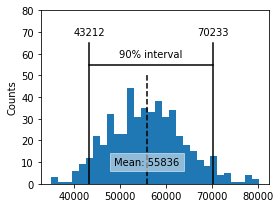

In [73]:
print('the population mean is: ' + str(loans_income.mean()))
np.random.seed(seed=3)  #<-This is generate the same seed/batch of random numbers
sample20 = resample(loans_income, n_samples=20, replace=False) # create a sample of 20 loan income data NOTE: You will see a different mean every time.
print('The resample mean is: ' + str(sample20.mean()))

"""Bootstrap method"""
results = []
for nrepeat in range(500): #NOTE: this for loop doesn't require nrepeat within the instruction
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

"""Trim the results of the bootstrap"""
confidence_interval = list(results.quantile([0.05, 0.95]))

"""Plot The histogram"""
ax = results.plot.hist(bins=30, figsize=(4, 3))

"""Plot the confidence intervals"""
ax.plot(confidence_interval, [55, 55], color='black') #The [55, 55] is the CI horizontal line
for x in confidence_interval: # This is the CI vertical Lines
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center') #This is the CI text
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

"""Plot the mean"""
meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--') #The vertical mean line
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

## 7C - Normal Distribution
### Standard Normal and QQ-Plots
The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

To compare data to a standard normal distribution, you subtract the mean and then divide by the standard deviation; This is also called 'normalization' or 'standardization'. The transformed value is often called the z-score

A QQ-Plot is used to visually determine how close a sample is to a specificed (commonly normal) distribution. 

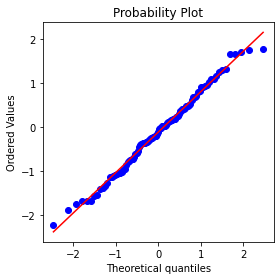

In [75]:
"""Below is a plot of 100 values randomly generated from a normal distribution;
as expected, the points closely follow the line."""

fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## 7D - Long-Tailed Distribution

Sometimes, the distribution is highly skewed (asymmetric). The tails of the distribution correspond to the extreme values (small and large). The long tails signify that it is much more likely to observe extreme values that we would expect. The is common for volatile stocks.

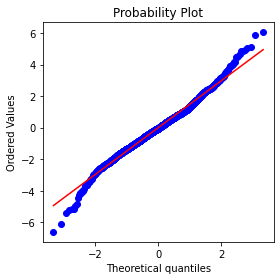

In [76]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

"""Calculate the Log Returns for Netflix"""
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

## 7E - Binomial Distributions (calculator)

Yes/no (binomial) outcomes are the heart of analytics - buy/don't buy, click/don't click, survive/die, etc.

Binomial distribution is the frequency distribution of the number of successes (x) in a given number of trials (n) with a specificed probability (p) of success in each trial. 

We can answer such questions like:

If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?

In [78]:
"""If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks"""
print(stats.binom.pmf(0, n=200, p=0.02))

0.017587946605721567


In [79]:
"""This is cumulative probability of getting 2 events or less """

print('The probability of exactly 2 events: ' + str(stats.binom.pmf(2, n=5, p=0.1)))
print('The probability of exactly 1 events: ' + str(stats.binom.pmf(1, n=5, p=0.1)))
print('The probability of exactly 0 events: ' + str(stats.binom.pmf(0, n=5, p=0.1)))
total =('The probability of 2 or less events: ' +  str((stats.binom.pmf(2, n=5, p=0.1)) + (stats.binom.pmf(1, n=5, p=0.1)) + (stats.binom.pmf(0, n=5, p=0.1))))

print(total)

"""It is easy to manually calculate cumalative probabilities with small numbers but it would be cumbersome for large
datasets. Below is the code to do cumalative probabilites"""
print(stats.binom.cdf(2, n=5, p=0.1))

The probability of exactly 2 events: 0.07289999999999992
The probability of exactly 1 events: 0.32804999999999995
The probability of exactly 0 events: 0.5904899999999998
The probability of 2 or less events: 0.9914399999999997
0.99144


##  7F - Poisson and Related Distribution
### Poisson Distributions

For events that occur at a constant rate, the number of events per unit of time or space can be modled as a Poisson distribution.

Many processes produce events randomly at a given overall rate - visitors arriving at a website or cars arriving at a toll plaza (events spread over time); imperfections in a square meter of fabric or typos per 100 lines of code (events spread over space). The Poisson distribuation tells us the distribution of events per unit of time or space.

For example: "How much capacity do we need to be 95% sure of fully proessing the internet traffice that arrives on a server in any five-second period?"

A key parameter in a Poisson distribution is lambda. The mean number of events that occurs in a specified interval of time or space. The variance is also considered a lambda.

This is the frequency of calls for every minute in a 100 minute interval
The total number of calls: 209


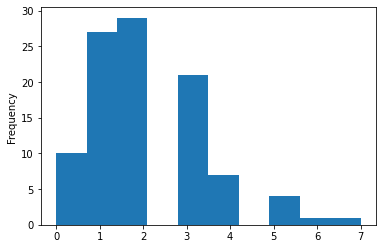

In [80]:
"""Example: incoming customer service calls average two per minute, this code will simulate 100 minutes
and return the number of calls for in each of those 100 minutes.

X is the number of calls in that minute; Y is the frequency
alternatively
X is the number of successes in one interval, Y is the number of intervals"""

sample = stats.poisson.rvs(2, size=100)
print('This is the frequency of calls for every minute in a 100 minute interval')
print('The total number of calls: ' + str(sample.sum()))

pd.Series(sample).plot.hist()
plt.show()

"""In theory, an average of two calls a minute equals 200 calls in 100 minutes. You can see how the number of calls differ
when it is randomized"""
sample_size = np.array(sample)

## 7G - Exponential Distributions

The model of time or distance between one event and the next

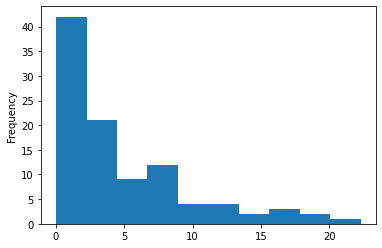

In [81]:
"""Using the the example for binomial distribution: if there is a probability of 0.2 of a click converting to a sale."""

sample = stats.expon.rvs(scale=1/0.2, size=100) #module uses inverse rates. so if the rate is 0.2 then it has a 5 value.
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()
sample_size = np.array(sample)

##  7H - Weibull Distributions

If the event rate changes over time of the interval, the exponential or poisson distribuations are useless. This is likley to be the case in mechanical failutre - the risk of failure increases as time goes by. Weibull is different that exponential as it allows the rate to change. 

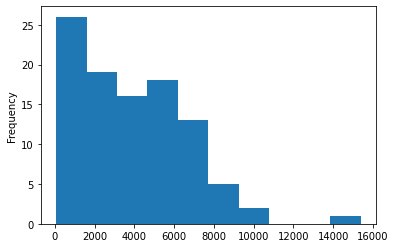

In [82]:
"""Takes 3 arguments
 Shape - if B>1 then probability of event increases over time, if B<2 then probability decreases over time
 
 scale - The characteristic life aka how many instances until an event
 
 n - number of quanties"""

sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()

# 8 -  Statistical Experiments and Significance Testing

A/B test is an experiment with two groups to establish which of the two treatments, products, procedures, or the like is superior. The term 'A/B test' is typically used in a web context for design of a webspage such as the wording of a headline, price of a product or some other item. 

Null Hypothesis - The baseline assumption that both treatments (aka set of samples/data) are equivalent and any observed difference ebtween groups is simply due to chance. 

There are two main types of resampling procedures: the bootstrap and permutation tests. The bootstrap is used to assess the realiablity of an estimate. Permutation tests are used to test hypothesis, typcially involving two ore more groups. 

## 8A - Permutation Test

The first step in a permutation test of a hypothesis is to combine the results from all groups. This is the logical embodiment of the null hypothesis that the treatments/sets of all groups do not differ. We then test that hypothesis by randomly drawings groups from this combined set and seeing how much they different from one another. The permutation produced is as follows:

1. Combine the results from the different groups into a single data set.
2. Shuffle the combined data and then randomly draw (without replacement) a resample of the same size as group A (clearly it will contain some data form the other groups).
3. From the remaining data, randomly draw (without replacement) a resample of the same size as group B.
4. Repeat the same for group C, D, and so on. You have now collected one set of resamples that mirror the sizes of the original samples.
5. Whatever statistic or estimate was calculated for the original samples (e.g., difference in group portions), calculate it now for the resamples, and record: this constitutes one permutation iteration.
6. Repeat the pervious steps R times to yiled a permutation distribution of the test statistic.

Now go back to the observed difference between teh groups and compare it to the set of permuted differences. If the observed difference lies well within the set of permuted differences, then we have not proven anything - the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that the chance is not responsible. In technical terms, the difference is statistically significant.

### Permutation Test Example 1 - Continuous Variables: Webstickiness 

A company selling a relative high-value service wants to test which of the two web presentations does a better selling job. Due to the high value of the service being sold, sales are infrequent and the sales cycle is lengthy: it would take too long to accumulate enough sales to know which presentation is superior. So the company decides to measure the results witha  proxy variable, such as number of clicsk on the detailed landing page or how long people spend on the page.

This example has two different presentations 21 for Page A and 15 for Page B.

In [83]:
session_times = pd.read_csv(WEB_PAGE_DATA_CSV)
session_times.Time = 100 * session_times.Time
session_times.head(3)

Page   Time
0  Page A   21.0
1  Page B  253.0
2  Page A   35.0

The boxplot shows that Page B has times greather than Page A by 36 seconds. The question is whether this difference is within the range of what random chance might produce (statistically significant). One way to answer this is to apply a permuation test - combine all the times together and then repeatedly shuffle and divide them into groups of 21. 

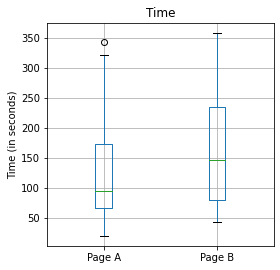

35.66666666666667


In [84]:
ax = session_times.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')

plt.tight_layout()
plt.show()

mean_a = session_times[session_times.Page == 'Page A'].Time.mean()
mean_b = session_times[session_times.Page == 'Page B'].Time.mean()
print(mean_b - mean_a)


In [85]:
"""

PERMUTATION FUNCTION

x = total values both feature A and feature B
nA = sample size of feature A
nB = sample size of feature B

"""
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB)) #Generate random numbers in range of 36 with a set matching the sample size B.
    idx_A = set(range(n)) - idx_B #Generate random numbers in range of 36 with a set matching the sample size A.
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()

x =   session_times.Time  
nA = session_times[session_times.Page == 'Page A'].shape[0] #The sample size
nB = session_times[session_times.Page == 'Page B'].shape[0] #The sample size
print(perm_fun(session_times.Time, nA, nB))

-34.16190476190475


The table below show the observed difference in time between page A and page B is will within the range of chance variation and this is not statistically significant.

We estimate the p-value from our permutation test by takign the porportion of times that the permutation test produces a difference equal to or great than the observed difference.

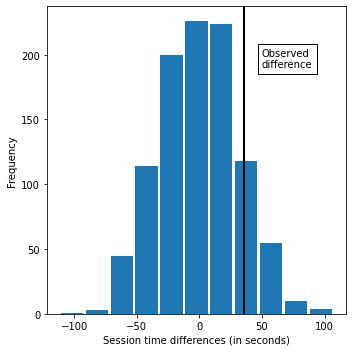

P-value: 0.124


In [86]:
random.seed(3)
perm_diffs = [perm_fun(session_times.Time, nA, nB) for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x = mean_b - mean_a, color='black', lw=2)
ax.text(50, 190, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Session time differences (in seconds)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# convert perm_diffs to numpy array to avoid problems with some Python installations
perm_diffs = np.array(perm_diffs)
print('P-value: ' + str(np.mean(perm_diffs > mean_b - mean_a)))

### Permutation Test Example 2 - Binary Variables: Price comparison

Two prices are compared by how many times an item was viewed and purchased vs not purchased. Often it is tempting to think a large data set does not require tests of significance but often (as in this case) the conversion rates are so low (lesss than 1%) so the power isn't sufficient. 

The null hypothesis and permutation procedure will ask "If the two prices share the same conversion rate, could chance varation produce a difference as big as 5%?"

1. Put cards labeled 1 and 0 in a box: this represents the supposed shared conversion rate of 382 ones and 45945 zeros = 0.008246 = 0.8246%

2. Shuffle and draw out a resample of size 23,739 (same n as price A), and record how many 1s

3. Record the number of 1s in the remaining 22,588 (same n as price B).

4. Record the difference in proportion of 1s

5. Repeat stepss 2-4

6. How often was the difference >=0.0368 (The difference in percentage conversion between Price A and Price B)

The histogram of 1,000 resampled results shows that the difference is well within range of chance variation

Observed difference: 0.0368%


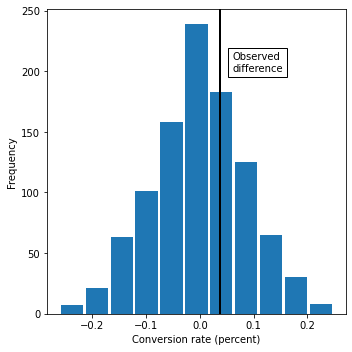

In [87]:
random.seed(1)
obs_pct_diff = 100 * (200 / 23739 - 182 / 22588) #qty of ones / total qty (ones + zeros)
print(f'Observed difference: {obs_pct_diff:.4f}%') #.4f refers to the number of sigfigs.
conversion = [0] * 45945 #Creates a series containing the total quanity of zeros
conversion.extend([1] * 382) #adds the total quantity of ones
conversion = pd.Series(conversion)

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2) #Plot the observed difference on the axis
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 8B p-Value Test

Simply looking at a a graph is not very precise method to measure statistical significance, so we look to p-value: the frequency with which chance model produces a results more extreme than the observed result.

We can estimate the p-value from the difference between the observed mean vs the permutated mean. The example blow means that we would expect to achieve a results extreme as this, or a more extreme result, by random chance over 30% on the time.


In [88]:
print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


### 8BA - T-Test

#### T-Test - Binary Variables Example 1: Comparing two features using `stats.chi2_contingency()`

In [89]:
"""p = 0.3498 means that we would expect to achieve a result as extreme as this by random chance over 30% of the time"""
"""The argument x is the number of succcesses for each group, and the argument y is the number of failures"""
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)

print(f'p-value for single sided test: {p_value / 2:.4f}')

p-value for single sided test: 0.3498


#### T-Test - Continuous Variables Example 2A: Comparing two features using `stats.ttest_ind()`

In [90]:
"""NOTE how similar the result is to the web stickness example"""
"""The argument x are the values for Variable A, and the argument y are the values for Variable B"""

res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                      session_times[session_times.Page == 'Page B'].Time,
                      equal_var=False)
print(f'p-value for single sided test: {res.pvalue / 2:.4f}') #Convert two-tailed to one-way by dividing by 2.

p-value for single sided test: 0.1408


#### T-Test Example 2B: Comparing two features using `stats.ttest_ind()`

In [91]:
tstat, pvalue, df = sm.stats.ttest_ind(
    session_times[session_times.Page == 'Page A'].Time, 
    session_times[session_times.Page == 'Page B'].Time,
    usevar='unequal', alternative='smaller')
print(f'p-value: {pvalue:.4f}')

p-value: 0.1408


### 8BB - ANOVA

ANOVA differs from t-test in which difference in Variance is observed instead of difference of Means.

The procedure :

1. Combine all the data together in a single box.
2. Shuffle and draw out four resamples of five values each.
3. Record the mean of each of the four groups.
4. Record the variance among the four group means.
5. Repeat steps 2-4 many (say, 1000) times.

What proportion fo the time did the resampled variance exceed the observed variance? This is the p-value

#### ANOVA Example 1: Manually calculating the p-Value of multple features

In [92]:
four_sessions = pd.read_csv(FOUR_SESSIONS_CSV)
four_sessions.head(3)

Page  Time
0  Page 1   164
1  Page 2   178
2  Page 3   175

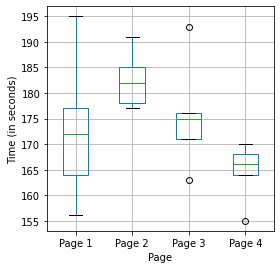

In [93]:
ax = four_sessions.boxplot(by='Page', column='Time',
                           figsize=(4, 4))
ax.set_xlabel('Page')
ax.set_ylabel('Time (in seconds)')
plt.suptitle('')
plt.title('')

plt.tight_layout()
plt.show()

In [94]:
observed_variance = four_sessions.groupby('Page').mean().var()[0]
print('Observed means:', four_sessions.groupby('Page').mean().values.ravel())
print('Variance:', observed_variance)

# Permutation test example with stickiness
def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(df['Time'].values)
    return df.groupby('Page').mean().var()[0]
    
print(perm_test(four_sessions))

Observed means: [172.8 182.6 175.6 164.6]
Variance: 55.426666666666655
9.186666666666701


We conclude by the below histogram that the difference is solely by chance variation as it just barely misses our alpha of 0.05.

Pr(Prob) 0.088


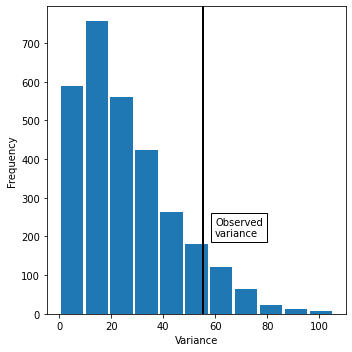

In [95]:
random.seed(1)
perm_variance = [perm_test(four_sessions) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.text(60, 200, 'Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### ANOVA Example 2: Calculating the p-Value of multple features using stats-model

Ordinary Least Squares (OLS) is a common technique used in analyzing linear regression as it compares the deviation between the true and predicted values. 

The formula is provided as a string, in the following form: ‘dependent variable ~ list of independent variables separated by the + symbol’ In plain terms, the dependent variable is the factor you are trying to predict, and on the other side of the formula are the variables you are using to predict.

NOTE: You will see that the p-value (PR (>f)) is about the same p-value that was found manually.

In [96]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


In [97]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time, 
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic / 2:.4f}')
print(f'p-value: {res.pvalue /2 }') #You may or may not need to divide by two for a 2 way anova

F-Statistic: 1.3699
p-value: 0.038793107629007305


### 8BC - Chi-Square Test

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

#### Chi-Square Test Example 1: 

Suppose you are testing three different headlines - A, B, C - and you run them each on 1,000 visitors. 

In [98]:
click_rate = pd.read_csv(CLICK_RATE_CSV)
click_rate.head(3)

Headline     Click  Rate
0  Headline A     Click    14
1  Headline A  No-click   986
2  Headline B     Click     8

In [99]:
click_rate = pd.read_csv(CLICK_RATE_CSV)
clicks = click_rate.pivot(index='Click', columns='Headline', values='Rate')
print(clicks)

Headline  Headline A  Headline B  Headline C
Click                                       
Click             14           8          12
No-click         986         992         988


The null hypothesis is that all three headlines share the same click rate.

34/3000 = 11.33 clicks per 1000

We can test this resampling alogrithim:
1. Constitute a box with 34 ones (clicks) and 2966 zeros (no clicks).
2. Shuffle, take three separate samples of 1,000, and count the clicks in each.
3. Find the squared differences between the shuffled counts and the expected counts and sum them.
4. Repeat steps 2 and 3, say, 1,000 times.
5. How often does the resampled sum of squared deviations exceed the observed? That's the p-value.

In [100]:
# Table 3-5
row_average = clicks.mean(axis=1)
pd.DataFrame({
    'Headline A': row_average,
    'Headline B': row_average,
    'Headline C': row_average,
})

Headline A  Headline B  Headline C
Click                                       
Click      11.333333   11.333333   11.333333
No-click  988.666667  988.666667  988.666667

In [101]:
# Resampling approach
box = [1] * 34
box.extend([0] * 2966)
random.shuffle(box)

def chi2(observed, expected):
    pearson_residuals = []
    for row, expect in zip(observed, expected):
        pearson_residuals.append([(observe - expect) ** 2 / expect
                                  for observe in row])
    # return sum of squares
    return np.sum(pearson_residuals)

expected_clicks = 34 / 3
expected_noclicks = 1000 - expected_clicks
expected = [expected_clicks, expected_noclicks]
chi2observed = chi2(clicks.values, expected)

def perm_fun(box):
    random.shuffle(box)
    sample_clicks = [sum(box[0:1000]),
                     sum(box[1000:2000]),
                     sum(box[2000:3000])]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [perm_fun(box) for _ in range(2000)]


"""The test shows this result could easily have been obtained by randomness"""
resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4660


#### Chi-Square Test Example 2: Shortcut

In [102]:
chisq, pvalue, df, expected = stats.chi2_contingency(clicks)
print(f'Observed chi2: {chisq:.4f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 1.6659
p-value: 0.4348


#### Chi-Square Test Example 3: Resampling

In [103]:
expected = [expected_clicks, expected_noclicks]
def sample_with_replacement(box):
    sample_clicks = [sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000)),
                     sum(random.sample(box, 1000))]
    sample_noclicks = [1000 - n for n in sample_clicks]
    return chi2([sample_clicks, sample_noclicks], expected)

perm_chi2 = [sample_with_replacement(box) for _ in range(2000)]

resampled_p_value = sum(perm_chi2 > chi2observed) / len(perm_chi2)
print(f'Observed chi2: {chi2observed:.4f}')
print(f'Resampled p-value: {resampled_p_value:.4f}')

Observed chi2: 1.6659
Resampled p-value: 0.4845


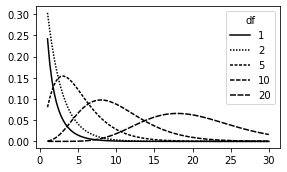

In [600]:
x = [1 + i * (30 - 1) / 99 for i in range(100)]

chi = pd.DataFrame({
    'x': x,
    'chi_1': stats.chi2.pdf(x, df=1),
    'chi_2': stats.chi2.pdf(x, df=2),
    'chi_5': stats.chi2.pdf(x, df=5),
    'chi_10': stats.chi2.pdf(x, df=10),
    'chi_20': stats.chi2.pdf(x, df=20),
})
fig, ax = plt.subplots(figsize=(4, 2.5))
ax.plot(chi.x, chi.chi_1, color='black', linestyle='-', label='1')
ax.plot(chi.x, chi.chi_2, color='black', linestyle=(0, (1, 1)), label='2')
ax.plot(chi.x, chi.chi_5, color='black', linestyle=(0, (2, 1)), label='5')
ax.plot(chi.x, chi.chi_10, color='black', linestyle=(0, (3, 1)), label='10')
ax.plot(chi.x, chi.chi_20, color='black', linestyle=(0, (4, 1)), label='20')
ax.legend(title='df')

plt.tight_layout()
plt.show()

# PLACE MULTI BANDIt ALGORITHM HERE!

## 8C - Power and Sample Size
statsmodels has a number of methods for power calculation

see e.g.: https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

Calculating power or required sample size, there are four moving parts:
- Sample size
- Effect size you want to detect
- Significance level (alpha) at which the test will be conducted
- Power

Specify any three of them and the fourth can be calculated. Most commonly, you want to calculate sample size so you must specify the other three. 

#### How to calculate the appropriate sample size using:
`sm.stats.proportion_effectsize()`, `sm.stats.TTestIndPower()`, `analysis.solve_power()`

The below example:
- Effect size you want to detect: increase from 1.1% to 1.21%
- Signifcance Level (alpha) 0.5
- Power (80)

In [104]:
#Important in determining Sample size.
effect_size = sm.stats.proportion_effectsize(0.0121, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 116602.393


If we prefer to detect an increase from 1.1% to 1.65%

In [105]:
effect_size = sm.stats.proportion_effectsize(0.0165, 0.011)
analysis = sm.stats.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, 
                              alpha=0.05, power=0.8, alternative='larger')
print('Sample Size: %.3f' % result)

Sample Size: 5488.408


# 9 - Regression and Prediction

## 9A - Simple Linear Regression

### Simple Linear Regression

One predictor

In [106]:
lung = pd.read_csv(LUNG_CSV)
lung.head(3)

PEFR  Exposure
0   390         0
1   410         0
2   430         0

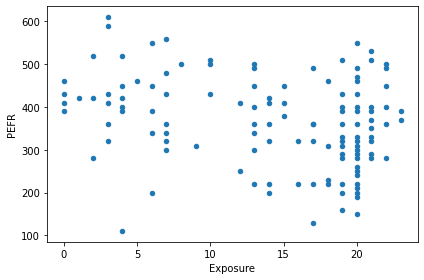

In [107]:
lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

#### How to model `LinearRegression` 

In [108]:
predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


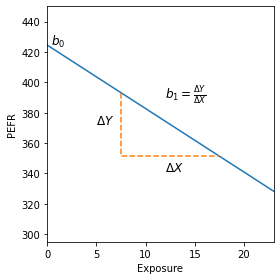

In [109]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), model.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, model.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = model.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

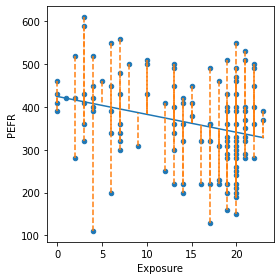

In [110]:
fitted = model.predict(lung[predictors])
residuals = lung[outcome] - fitted

ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

In [111]:
#How to predict an invidvidual value. You will see the prediction matches the dataframe

test = np.array([15]) #Create an array
test = test.reshape(-1, 1) #Reshape it to the format of the predictive model
print (model.predict(test))

lung[lung.Exposure == 15]

[361.81415929]


C:\Users\Monarch Eubanks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


PEFR  Exposure
54   380        15
55   410        15
56   450        15

## 9B -  Multiple Linear Regression

Multiple predictors

In [115]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

house = pd.read_csv(HOUSE_CSV, sep='\t')
print(house[subset].head(2))

   AdjSalePrice  SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade
1      300805.0           2400     9373       3.00         6          7
2     1076162.0           3764    20156       3.75         4         10


In [116]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240754
 SqFtLot: -0.06046682065306008
 Bathrooms: -19442.840398321146
 Bedrooms: -47769.955185214094
 BldgGrade: 106106.9630789811


## 9C - Weighted Regression

Used to give certain records more or less weight in fitting the equation. 

We can calculate the Year from the date column using either a list comprehension or the data frame's `apply` method.
Sklearn  allows the argument sample_weight in the call to fit the method

In [117]:
#Extract the year from the sales dates. New sales data are more valuable than older sales data
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Year'] = house.DocumentDate.apply(lambda d: int(d.split('-')[0]))
house['Weight'] = house.Year - 2005

In [118]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

pd.concat([
    pd.DataFrame({
        'predictor': predictors,
        'house_lm': house_lm.coef_,
        'house_wt': house_wt.coef_,    
    }),
    pd.DataFrame({
        'predictor': ['intercept'],
        'house_lm': house_lm.intercept_,
        'house_wt': house_wt.intercept_,    
    })
])

predictor       house_lm       house_wt
0  SqFtTotLiving     228.830604     245.024089
1        SqFtLot      -0.060467      -0.292415
2      Bathrooms  -19442.840398  -26085.970109
3       Bedrooms  -47769.955185  -53608.876436
4      BldgGrade  106106.963079  115242.434726
0      intercept -521871.368188 -584189.329446

In [119]:
residuals = pd.DataFrame({
    'abs_residual_lm': np.abs(house_lm.predict(house[predictors]) - house[outcome]),
    'abs_residual_wt': np.abs(house_wt.predict(house[predictors]) - house[outcome]),
    'Year': house['Year'],
})
print(residuals.head())
# axes = residuals.boxplot(['abs_residual_lm', 'abs_residual_wt'], by='Year', figsize=(10, 4))
# axes[0].set_ylim(0, 300000)

pd.DataFrame(([year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt'])] 
              for year, group in residuals.groupby('Year')),
             columns=['Year', 'mean abs_residual_lm', 'mean abs_residual_wt'])
# for year, group in residuals.groupby('Year'):
#     print(year, np.mean(group['abs_residual_lm']), np.mean(group['abs_residual_wt']))

   abs_residual_lm  abs_residual_wt  Year
1    123750.814194    107108.553965  2014
2     59145.413089     96191.882094  2006
3    190108.725716    187004.492880  2007
4    198788.774412    196132.996857  2008
5     91774.996129     84277.577512  2013


Year  mean abs_residual_lm  mean abs_residual_wt
0  2006         140540.303585         146557.454636
1  2007         147747.577959         152848.523235
2  2008         142086.905943         146360.411668
3  2009         147016.720883         151182.924825
4  2010         163267.674885         166364.476152
5  2011         169937.385744         172950.876028
6  2012         169506.670053         171874.424266
7  2013         203659.777510         206242.199403
8  2014         184452.840665         186668.573750
9  2015         172323.435147         169842.742053

## 9D -  Assessing the Models

Measures the accuracy of the model

An R2 value of 1 suggests the predictions perfectly fit the data. A value of 0.541 signifies a model represents 54% of the data.

A RMSE value of 0 suggests there is no error in the predictions.

While _scikit-learn_ provides a variety of different metrics, _statsmodels_ provides a more in-depth analysis of the linear regression model. This package has two different ways of specifying the model, one that is similar to _scikit-learn_ and one that allows specifying _R_-style formulas. Here we use the first approach. As _statsmodels_ doesn't add an intercept automaticaly, we need to add a constant column with value 1 to the predictors. We can use the _pandas_ method assign for this.

In [120]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


__HOW TO READ OLS REPORT:__

    Dependent Variable: y outcome
    Df Residuals: degrees freedom of Residuals
    Df Model: degress freedom of Model
    Df Model: Number of features
    Covariance Types: robust covariance is calculated in a way to minimize or eliminate variables
    Adj. R-Squared: Considers the number of predictors in the model and penalizes excessive variables.
    p-value: p-value of 0.323 is saying there is a 32.3% chance that this variable has no effect on the dependent variable.
    Omnibus: 0 equals perfect normalcy.
    Skew: 0 equals perfect symmetry of data
    Kurtosis: Higher means fewer outliers
    Durbin_Watson: Ideally between 1-2 for homoscedaasticity
    JB: alternative version of omnibus
    Condition Number: sensitivity of model.

In [717]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:17:01   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

## 9E -  Model Selection and Stepwise Regression

Stepwise regression could start with a full model and successfively drop variables that don't contribute meaningfully (backward elmination), start with a  cosntant model and successively add variables (forward selection) or successively add and drop predictors to find a model that lowers AIC or adjusted R2. In summary, Stepwise Regression is a way to automatically determine which variables should be included in the model.

scikit-learn has no implementation for stepwise regression. so functions have been created for these items.

In [718]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated', 
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True, dtype=int) #Convert predictors to binary values.
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:33:56   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

In [719]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, 
                                                verbose=True)

print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420158
 BldgGrade: 137159.5602261976
 YrBuilt: -3565.424939249463
 Bedrooms: -51947.38367361413
 Bathrooms: 42396.16452772056
 PropertyType_Townhouse: 84479.16203299937
 SqFtFinBasement: 7.046974967583083
 PropertyType_Single Family: 22912.05518701767


## 9F -  Polynomial and Spline Regression

The relationship between the response and a predictor variable isn't necessarily linear. The response to the dose of a drug is often nonlienar: doubling the dosage gernally doesn't lead ot a double response.

In [804]:
model_poly = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' + 
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          9.95e-106
Time:                        17:27:12   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The statsmodels implementation of a partial residual plot works only for linear term. Here is an implementation of a partial residual plot that, while inefficient, works for the polynomial regression.

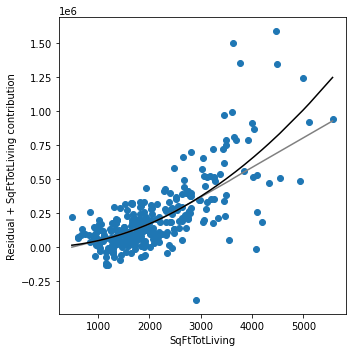

0.03879128168231151


In [805]:
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)
    
    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[2])

An alternative and often superior, approach to modeling nonlinear relationships is to use splines. Spliens provide a way to smoothly interpolate between fixed points. splines are functions which are piecewise polynomial. The coefficients of the polynomial differs from interval to interval, but the order of the polynomial is the same.

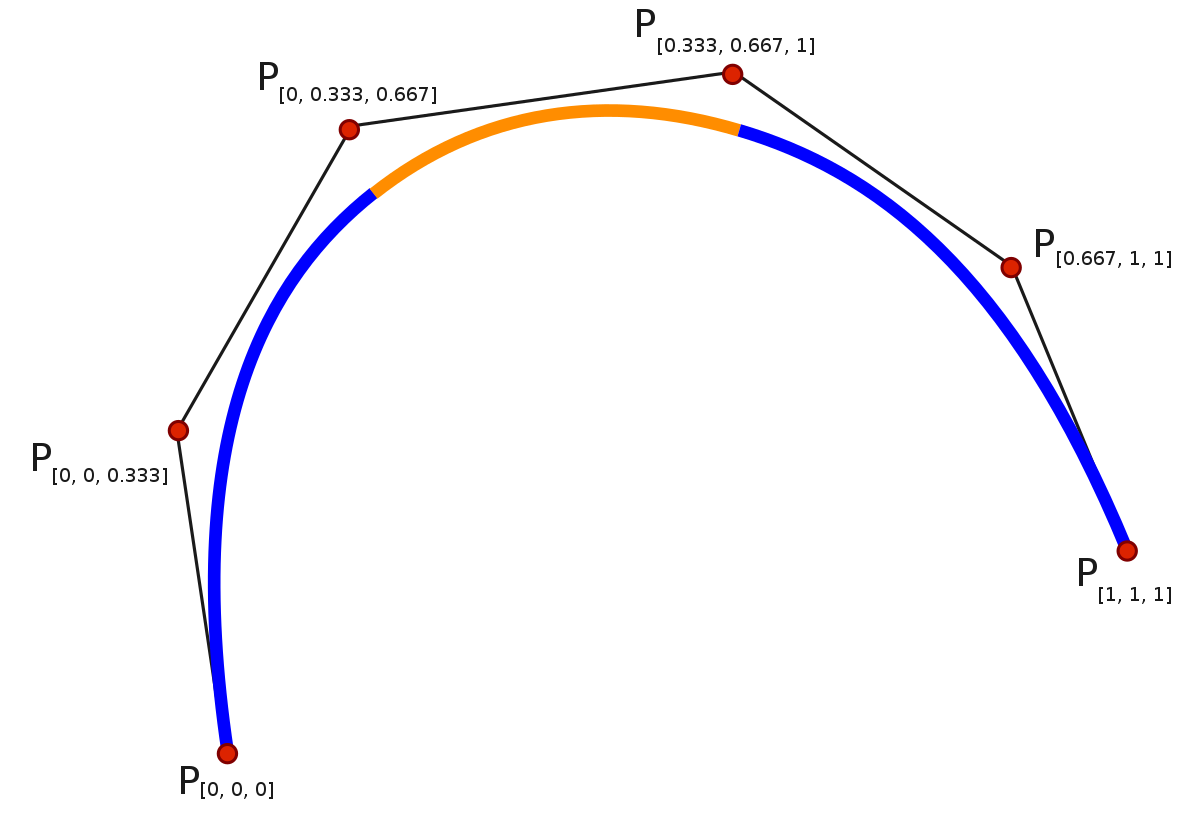

In [806]:
formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()
print(result_spline.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     131.8
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          7.10e-104
Time:                        17:33:09   Log-Likelihood:                -4211.4
No. Observations:                 313   AIC:                             8445.
Df Residuals:                     302   BIC:                             8486.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


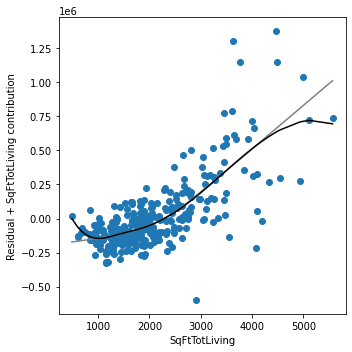

In [807]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline, house_98105, 'AdjSalePrice', 'SqFtTotLiving', ax)

plt.tight_layout()
plt.show()

## 9G -  Generalized Additive Models

Suppose you suspect a nonlinear relationship between the response and a predictor variable. GAM are a flexible modeling technique that can be used to automatically fit a spline regression.

In [808]:
from statsmodels.gam.api import GLMGam, BSplines

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

x_spline = house_98105[predictors]
bs = BSplines(x_spline, df=[10] + [3] * 4, degree=[3] + [2] * 4)
# penalization weight
alpha = np.array([0] * 5)

formula = ('AdjSalePrice ~ SqFtTotLiving + ' + 
           'SqFtLot + Bathrooms + Bedrooms + BldgGrade')

gam_sm = GLMGam.from_formula(formula, data=house_98105, smoother=bs, alpha=alpha)
res_sm = gam_sm.fit()
print(res_sm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           AdjSalePrice   No. Observations:                  313
Model:                         GLMGam   Df Residuals:                      295
Model Family:                Gaussian   Df Model:                        17.00
Link Function:               Identity   Scale:                      2.7471e+10
Method:                         PIRLS   Log-Likelihood:                -4196.6
Date:                Tue, 28 Nov 2023   Deviance:                   8.1039e+12
Time:                        17:38:14   Pearson chi2:                 8.10e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9901
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.481e+05   1.18e+05  

## 9H - Prediction with Catagorical/Binary Variables

### Factor Variables (Catagorical Variables)

#### Dummy Variables - converting catogrical variables to binary using `pd.get_dummies()` 

In [121]:
print(house.PropertyType.head(6))

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
6        Townhouse
Name: PropertyType, dtype: object


In [122]:
print(pd.get_dummies(house['PropertyType']).head(6))

   Multiplex  Single Family  Townhouse
1          1              0          0
2          0              1          0
3          0              1          0
4          0              1          0
5          0              1          0
6          0              0          1


NOTE: you must drop the first binary variable to avoid multicollinearity.

In [123]:
print(pd.get_dummies(house['PropertyType'], drop_first=True).head(6))

   Single Family  Townhouse
1              0          0
2              1          0
3              1          0
4              1          0
5              1          0
6              0          1


NOTE: There is no coefficent of Multiplex since it is implicitly defined when PropertyType_Single Family == 0 and PropertyType_Townhouse ==0. The coeffecients are interpreted relative to mulitplex, so a home that is a Single Family is worth 85,000 less and a home that is a Townhouse is worth over $150,000 less.

In [124]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType']

X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503805
 SqFtLot: -0.07036798136812195
 Bathrooms: -15979.013473415263
 Bedrooms: -50889.73218483014
 BldgGrade: 109416.30516146208
 PropertyType_Single Family: -84678.21629549275
 PropertyType_Townhouse: -115121.97921609186


In [125]:
X.head(3)

SqFtTotLiving  SqFtLot  Bathrooms  Bedrooms  BldgGrade  \
1           2400     9373       3.00         6          7   
2           3764    20156       3.75         4         10   
3           2060    26036       1.75         4          8   

   PropertyType_Single Family  PropertyType_Townhouse  
1                           0                       0  
2                           1                       0  
3                           1                       0

#### Factor Variables with many levels

A zip code is an example of binary dummmies with a large quanity of factor variables. It is useful to determine if levels should be consolidated

The below has over 80 zip codes.

In [126]:
print(pd.DataFrame(house['ZipCode'].value_counts()).transpose())

         98038  98103  98042  98115  98117  98052  98034  98033  98059  98074  \
ZipCode    788    671    641    620    619    614    575    517    513    502   

         ...  98051  98024  98354  98050  98057  98288  98224  98068  98113  \
ZipCode  ...     32     31      9      7      4      4      3      1      1   

         98043  
ZipCode      1  

[1 rows x 80 columns]


In [127]:
house = pd.read_csv(HOUSE_CSV, sep='\t')

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

#Grouping zip codes
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual' : house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins=False)
zip_groups.head()
print(zip_groups.ZipGroup.value_counts().sort_index())

0    16
1    16
2    16
3    16
4    16
Name: ZipGroup, dtype: int64


In [128]:
to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

### Order Variables

Also can be referred to as rank variables, BldgGrade for example, has the following ranking:
- 1 Cabin
- 2 Substandard
- 5 Fair
- 10 Very Good
- 12 Luxury
- 13 Mansion

Regression models treat these values as a numeric variable.

In [129]:
house[['DocumentDate','AdjSalePrice', 'BldgGrade']].head(3)

DocumentDate  AdjSalePrice  BldgGrade
1   2014-09-16      300805.0          7
2   2006-06-16     1076162.0         10
3   2007-01-29      761805.0          8

### Correlated Predictors

Predictor variables are often correlated with each other. 

The coefficent for Bedrooms is negative! This implies that adding a bedroom to a house will reduce its value. How can this be? This is because the predictor variables are correlated: larger houses tend to have more bedrooms, and it is the size that drives the house value, not the number of bedrooms. Consider two homes of the exact same size: it is reasonable to expct that a home with more but smaller bedrooms would be considered less desirable. Refer to example below:

In [130]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

NameError: name 'best_model' is not defined

After removing SqFtTotLiving, the bedroom coefficent is now positive:

In [131]:
predictors = ['Bedrooms', 'BldgGrade', 'PropertyType', 'YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])


print(f'Intercept: {reduced_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, reduced_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 4913973.344
Coefficients:
 Bedrooms: 27150.537230219703
 BldgGrade: 248997.79366212635
 YrBuilt: -3211.7448621551157
 PropertyType_Single Family: -19898.495340501973
 PropertyType_Townhouse: -47355.436873344275


### Multicollinearity

As condition which there is redundance among the predictor variables. This occurs when:
- A variable is included multiple times by error.
- P dummmies, instead of P-1 dummies, are created from a factor variable
- Two variables are nearly perfectly correlated with one another

Variables should be removed until  multicollinearity is gone.

### Confounding Variables

Correlated variables have the problem of including diffferent variables that have similar predictive relationship.

Confounding variables have the problem of an important variable not included in the regression equation.

Both these problems can produce coefficients that can lead to invalid conclusions. Refer to the example below.

SqftLot, Bathrooms and Bedrooms coefficients were all negative in the original regression model. This is because it was missing ZipGroup which is important variable as it can increase home value as much as $340,000. You will notice that SqftLot and Bathrooms are now positive. Note that more bedrooms having less value is a known phenomenon in real estate.

In [132]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.61266005580134
 SqFtLot: 0.45498713854659023
 Bathrooms: 5928.425640001405
 Bedrooms: -41682.871840744636
 BldgGrade: 98541.18352726007
 PropertyType_Single Family: 19323.625287919374
 PropertyType_Townhouse: -78198.72092762377
 ZipGroup_1: 53317.17330659819
 ZipGroup_2: 116251.58883563553
 ZipGroup_3: 178360.5317879338
 ZipGroup_4: 338408.60185652046


### Interaction and Main Effects

Main Effects (predictors) are assumed to have a response that is indepedent of other predictors. This is often not the case as per the example below:

In [133]:
model = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving*ZipGroup + SqFtLot + ' +
     'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:14:58   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Outliers

One must assess how well the model fits the data.

The outlier formula designates outliers based on an upper and lower boundary (you can think of these as cutoff points). Any value that is 1.5 x IQR greater than the third quartile is designated as an outlier and any value that is 1.5 x IQR less than the first quartile is also designated as an outlier.

First, fit the data

In [134]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()
print(result_98105.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     238.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):          1.69e-103
Time:                        16:15:02   Log-Likelihood:                -4226.0
No. Observations:                 313   AIC:                             8464.
Df Residuals:                     307   BIC:                             8486.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   209.6023     24.408      8.587

Second, extract the residuals. In this case, there are more than four standard errors above the regression line.

In [135]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal

print(sresiduals.idxmin(), sresiduals.min())

24333 -4.326731804078558


Third, which corresponds to an overestimate of $757,754

In [136]:
print(result_98105.resid.loc[sresiduals.idxmin()])

-757753.6192115817


The below results for the below outlier don't make sense as a house with this size typically sells for much more than $119,748. The reason is actually because this data point includes the sale of a house that has partial ownership. This is an example that outliers must be examined.

In [137]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


### Influential values

A value whose absense would significantly change the regression equation. This is different than an outlier because in this case the data point is actually valid.

NOTE: This is usually only an issue with smaller data sets as it is unlikely an individual value can change the regression fit with large data sets.

The solid line below is the regression model including the data point and the dashed line below is the regression model removing the data point. It is clear that this data point is an infulential value.

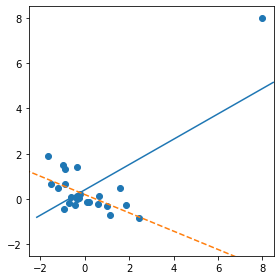

In [138]:
%matplotlib inline
from scipy.stats import linregress

np.random.seed(5)
x = np.random.normal(size=25)
y = -x / 5 + np.random.normal(size=25)
x[0] = 8
y[0] = 8

def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(x, y)
slope, intercept, _, _, _ = linregress(x, y)
ax.plot(*abline(slope, intercept, ax))
slope, intercept, _, _, _ = linregress(x[1:], y[1:])
ax.plot(*abline(slope, intercept, ax), '--')
ax.set_xlim(-2.5, 8.5)
ax.set_ylim(-2.5, 8.5)

plt.tight_layout()
plt.show()

The below diagram shows there are a lot of data points that have large influence in the regression. Values with a cooks distance higher than 0.08 have high influence

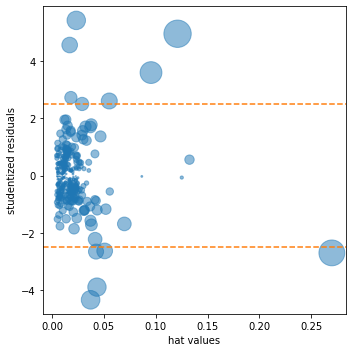

In [139]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, 
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout()
plt.show()

The below shows how the model changes with the influence removed. You will see that Bathrooms value has drastically changed.

In [140]:
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = house_98105.loc[mask]

ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': result_98105.params,
    'Influential removed': result_infl.params,
})

Original  Influential removed
SqFtTotLiving     209.602346           230.052569
SqFtLot            38.933315            33.141600
Bathrooms        2282.264145        -16131.879785
Bedrooms       -26320.268796        -22887.865318
BldgGrade      130000.099737        114870.559737
const         -772549.862447       -647137.096716

### Heteroskedasticity, Non-Normality and Correlated Errors

Residuals - the difference between the predicted and real value.

Heteroskedasticity - The residuals are not constant across the range of predicted values.

The example below shows the residuals tends to increase for higher-valued homes. Heteroskedasticity is important for data scientists because it may suggest an incomplete model. The example below suggests that there may be something unaccounted for in high range homes


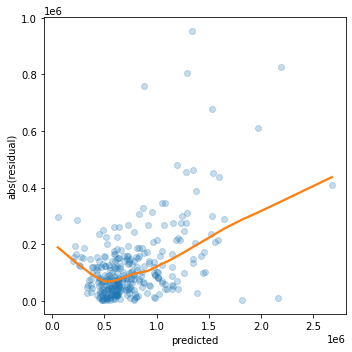

In [142]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid), 
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout()
plt.show()

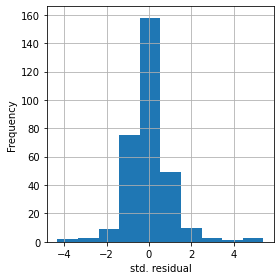

In [141]:
fig, ax = plt.subplots(figsize=(4, 4))
pd.Series(influence.resid_studentized_internal).hist(ax=ax)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')


plt.tight_layout()
plt.show()

### Partial Residual Plots and Nonlinearity

Partial residual plots are a way to visualize how well the estimated fit explains the relationship between a predictor and the outcome. The plot displays the predictor on the X axis and the partial residual on the Y axis.


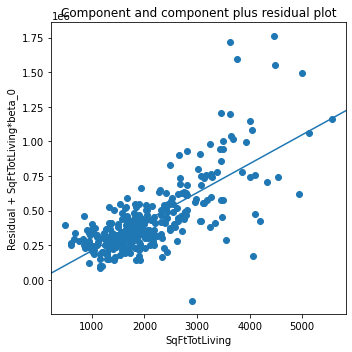

In [802]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout()
plt.show()

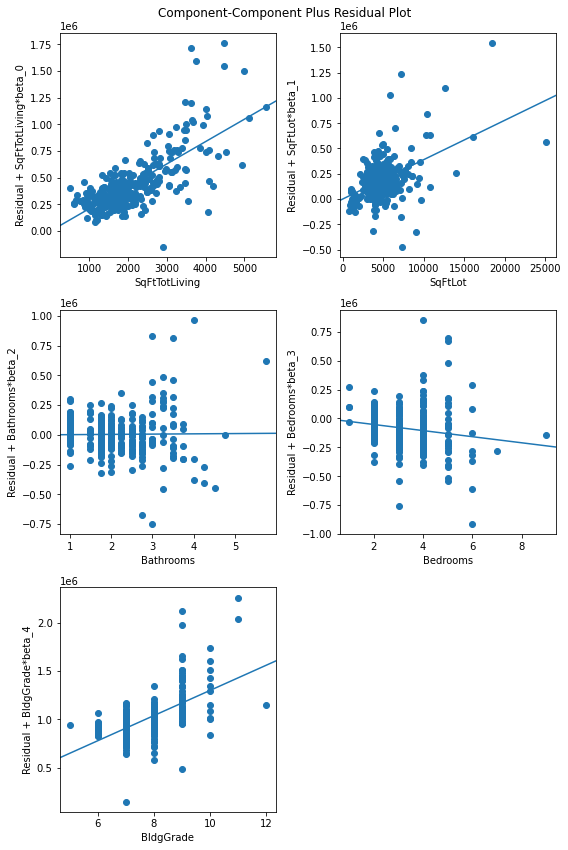

In [143]:
fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)

# 10 - Classification Methods

## 10A - Naive Solution Classification Method

The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification.

Works with ONLY binary/catagorical (factor) predictors and outcomes. It asks "Within each outcome catagory, which predictor categories are most probable?". That information is then inverted to estimate probabilities of outcome categories, given predictor values.

In [144]:
loan_data = pd.read_csv(LOAN_DATA_CSV)
loan_data.tail(3)

Unnamed: 0      status  loan_amnt       term  annual_inc    dti  \
45339       45340  Fully Paid       4375  36 months       20000   7.95   
45340       45341  Fully Paid       8000  36 months       48000  26.91   
45341       45342  Fully Paid      35000  60 months      100000   7.82   

       payment_inc_ratio  revol_bal  revol_util             purpose  ...  \
45339             9.9846       6574        73.0  debt_consolidation  ...   
45340             6.4525      10303        32.4  debt_consolidation  ...   
45341            11.8715      16676        91.6  debt_consolidation  ...   

      delinq_2yrs_zero  pub_rec_zero  open_acc  grade   outcome emp_length  \
45339                1             1         8    2.4  paid off          1   
45340                1             1        10    5.2  paid off          1   
45341                0             1        13    0.4  paid off          9   

                 purpose_     home_   emp_len_ borrower_score  
45339  debt_consolidation  MORTGAGE   > 1 Year           0.55  
45340  debt_consolidation  MORTGAGE   > 1 Year           0.65  
45341  debt_consolidation  MORTGAGE   > 1 Year           0.50  

[3 rows x 21 columns]

The below Example shows how to use the model to predict the classification and provide the probabilites for each classification.

In [145]:
loan_data = pd.read_csv(LOAN_DATA_CSV)

# convert to categorical
loan_data.outcome = loan_data.outcome.astype('category')
loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
loan_data.purpose_ = loan_data.purpose_.astype('category')
loan_data.home_ = loan_data.home_.astype('category')
loan_data.emp_len_ = loan_data.emp_len_.astype('category')

predictors = ['purpose_', 'home_', 'emp_len_']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
y = loan_data[outcome]

naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
#naive_model = MultinomialNB(alpha=1e-10, fit_prior=False)
naive_model.fit(X, y)

new_loan = X.loc[146:146, :]
print('predicted class: ', naive_model.predict(new_loan)[0])

probabilities = pd.DataFrame(naive_model.predict_proba(new_loan),
                             columns=naive_model.classes_)
print('predicted probabilities',)
print(probabilities)

predicted class:  default
predicted probabilities
    default  paid off
0  0.653696  0.346304


## 10B -  Discriminant Analysis Classification Method

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events.

Works with both category and continuous variables

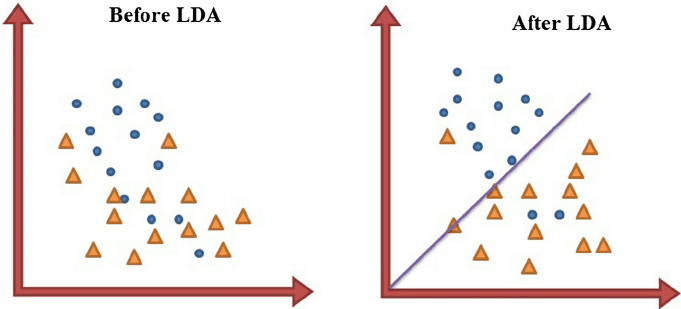

The below example has two features, borrower_score and payment_inc_ratio. Discriminant Analysis takes these two features and displays the discriminator weights.

In [146]:
loan3000 = pd.read_csv(LOAN3000_CSV)
loan3000.outcome = loan3000.outcome.astype('category')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)
print(pd.DataFrame(loan_lda.scalings_, index=X.columns))

                          0
borrower_score     7.175839
payment_inc_ratio -0.099676


In [147]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[predictors]),
                    columns=loan_lda.classes_)
print(pred.head())

    default  paid off
0  0.553544  0.446456
1  0.558953  0.441047
2  0.272696  0.727304
3  0.506254  0.493746
4  0.609952  0.390048


The center line is 50% probability.
The left side of the line is predicted to default; right side predicted to be paid off.
The further away from the line, the higher the probability it falls within this catagory.

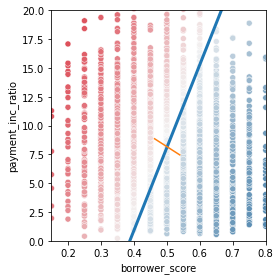

In [148]:
# Use scalings and center of means to determine decision boundary
center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

fig, ax = plt.subplots(figsize=(4, 4))
g = sns.scatterplot(x='borrower_score', y='payment_inc_ratio',
                    hue='default', data=lda_df, 
                    palette=sns.diverging_palette(240, 10, n=9, as_cmap=True),
                    ax=ax, legend=False)

ax.set_ylim(0, 20)
ax.set_xlim(0.15, 0.8)
ax.plot((x_0, x_20), (0, 20), linewidth=3)
ax.plot(*loan_lda.means_.transpose())

plt.tight_layout()
plt.show()

In [149]:
new_loan.columns

Index(['credit_card', 'debt_consolidation', 'home_improvement',
       'major_purchase', 'medical', 'other', 'small_business', 'MORTGAGE',
       'OWN', 'RENT', ' < 1 Year', ' > 1 Year'],
      dtype='object')

## 10C -  Logisitic Regression Method 

Similar to multiple linear regression, execpt the outcome is binary (classification). Think of the outcome variable not as a binary but as a probability. The binary classificaiton is an output of the highest probability.

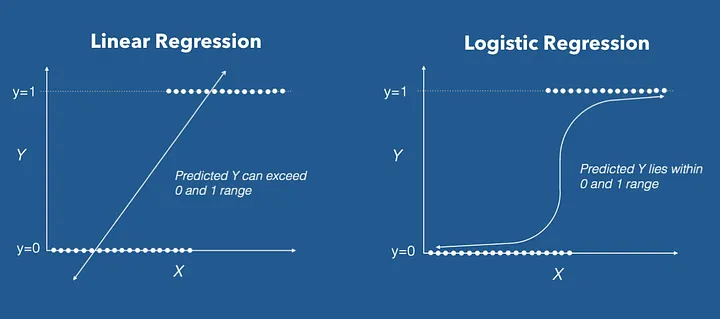

The response in logistic regression formula is the log odds of a binary outcome of 1. We observe only the binary outcome, not the log odds. Logistic Regression is a special instance of a generalized linear model (GLM) developed to extend linear reegression to other settings.



Below is a python visualization of logistic regression:

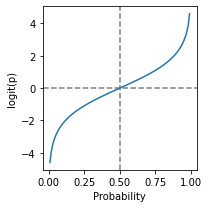

In [210]:
p = np.arange(0.01, 1, 0.01)
df = pd.DataFrame({
    'p': p,
    'logit': np.log(p / (1 - p)),
    'odds': p / (1 - p),
})

fig, ax = plt.subplots(figsize=(3, 3))
ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0.5, color='grey', linestyle='--')
ax.plot(df['p'], df['logit'])
ax.set_xlabel('Probability')
ax.set_ylabel('logit(p)')

plt.tight_layout()
plt.show()

The package _scikit-learn_ has a specialised class for `LogisticRegression`. _Statsmodels_ has a more general method based on generalized linear model (GLM).

NOTE: the values are logit odds ratio. One needs to take the exponential to convert to probability

In [150]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 
              'borrower_score']
outcome = 'outcome'
X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', 
                   drop_first=True, dtype=int)
y = loan_data[outcome] # .cat.categories


"""penalty and C are used to prevent overfitting. We set pentalty and C to large values to prevent regularization"""
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
logit_reg.fit(X, y)

print('intercept ', logit_reg.intercept_[0])
print('classes', logit_reg.classes_)
pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             index=X.columns)

intercept  -1.638088683407208
classes ['default' 'paid off']


coeff
payment_inc_ratio  -0.079728
borrower_score      4.611037
debt_consolidation -0.249342
home_improvement   -0.407614
major_purchase     -0.229376
medical            -0.510087
other              -0.620534
small_business     -1.215662
OWN                -0.048453
RENT               -0.157355
 > 1 Year           0.357464

In [151]:
X.head()

payment_inc_ratio  borrower_score  debt_consolidation  home_improvement  \
0            2.39320            0.65                   0                 0   
1            4.57170            0.80                   0                 0   
2            9.71600            0.60                   0                 0   
3           12.21520            0.50                   1                 0   
4            3.90888            0.55                   0                 0   

   major_purchase  medical  other  small_business  OWN  RENT   > 1 Year  
0               1        0      0               0    0     1          1  
1               0        0      0               1    1     0          1  
2               0        0      1               0    0     1          1  
3               0        0      0               0    0     1          1  
4               0        0      1               0    0     1          1

In [213]:
"""To convert to probabilities"""
#np.exp(pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
             #index=X.columns))

'To convert to probabilities'

In [152]:
print(loan_data['purpose_'].cat.categories)
print(loan_data['home_'].cat.categories)
print(loan_data['emp_len_'].cat.categories)

Index(['credit_card', 'debt_consolidation', 'home_improvement',
       'major_purchase', 'medical', 'other', 'small_business'],
      dtype='object')
Index(['MORTGAGE', 'OWN', 'RENT'], dtype='object')
Index([' < 1 Year', ' > 1 Year'], dtype='object')


If you have a feature or outcome variable that is ordinal, use the scikit-learn `OrdinalEncoder` to replace the categories (here, 'paid off' and 'default') with numbers. In the below code, we replace 'paid off' with 0 and 'default' with 1. This reverses the order of the predicted classes and as a consequence, the coefficients will be reversed. 

In [153]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(categories=[['paid off', 'default']])
y_enc = enc.fit_transform(loan_data[[outcome]]).ravel()

logit_reg_enc = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg_enc.fit(X, y_enc)

print('intercept ', logit_reg_enc.intercept_[0])
print('classes', logit_reg_enc.classes_)
pd.DataFrame({'coeff': logit_reg_enc.coef_[0]}, 
             index=X.columns)

intercept  1.6380885435754573
classes [0. 1.]


coeff
payment_inc_ratio   0.079728
borrower_score     -4.611037
debt_consolidation  0.249342
home_improvement    0.407614
major_purchase      0.229376
medical             0.510087
other               0.620534
small_business      1.215662
OWN                 0.048453
RENT                0.157355
 > 1 Year          -0.357463

#### Predicted Values from Logistic Regression (might delete)

In [873]:
pred = pd.DataFrame(logit_reg.predict_log_proba(X),
                    columns=logit_reg.classes_)
print(pred.describe())

            default      paid off
count  45342.000000  45342.000000
mean      -0.757850     -0.760423
std        0.378032      0.390419
min       -2.768873     -3.538865
25%       -0.985728     -0.977164
50%       -0.697366     -0.688946
75%       -0.472209     -0.467076
max       -0.029476     -0.064787


In [874]:
pred = pd.DataFrame(logit_reg.predict_proba(X),
                    columns=logit_reg.classes_)
print(pred.describe())

            default      paid off
count  45342.000000  45342.000000
mean       0.500001      0.499999
std        0.167336      0.167336
min        0.062733      0.029046
25%        0.373167      0.376377
50%        0.497895      0.502105
75%        0.623623      0.626833
max        0.970954      0.937267


#### Assessing the Model

Determine how accurately the model classifies new data

In [154]:
# use GLM (general linear model) with the binomial family to 
# fit a logistic regression
y_numbers = [1 if yi == 'default' else 0 for yi in y]
logit_reg_sm = sm.GLM(y_numbers, X.assign(const=1), 
                      family=sm.families.Binomial())
logit_result = logit_reg_sm.fit()
print(logit_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                45342
Model:                            GLM   Df Residuals:                    45330
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28757.
Date:                Tue, 05 Dec 2023   Deviance:                       57515.
Time:                        16:19:10   Pearson chi2:                 4.54e+04
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1112
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
payment_inc_ratio      0.0797      0

# 11 - Evaluating Classification Models

It is common in predictive modeling to train a number of different models, apply each to a holdout sample and assess their performance. Sometimes, after a number of models have been evaluated and tuned, and if there are enough data, a third holdout sample, not used previously, is used to estimate how the chosen model will perform with completely new data.

## 11A - Confusion Matrix

At the heart of classifaction metrics is a confusion matrix. It is a table showing the number of correct and incorrect predictions categorized by type of response.

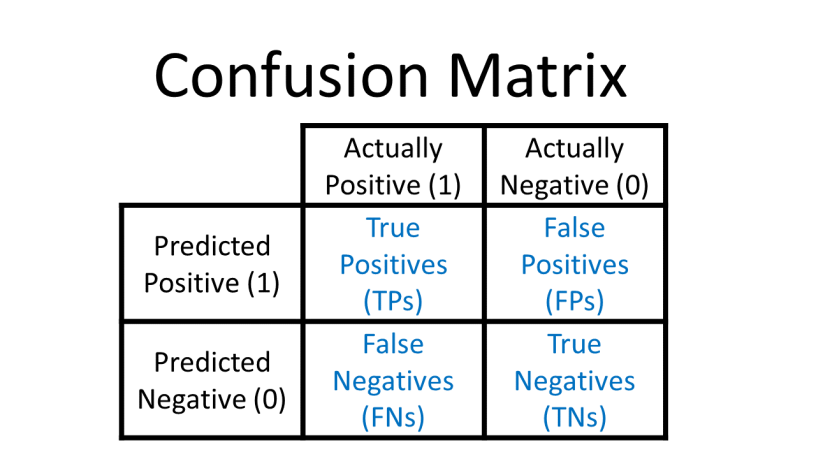

In [155]:
# Confusion matrix
pred = logit_reg.predict(X)
pred_y = logit_reg.predict(X) == 'default'
true_y = y == 'default'
true_pos = true_y & pred_y
true_neg = ~true_y & ~pred_y
false_pos = ~true_y & pred_y
false_neg = true_y & ~pred_y

conf_mat = pd.DataFrame([[np.sum(true_pos), np.sum(false_neg)], [np.sum(false_pos), np.sum(true_neg)]],
                       index=['Y = default', 'Y = paid off'],
                       columns=['Yhat = default', 'Yhat = paid off'])
print(conf_mat)

              Yhat = default  Yhat = paid off
Y = default            14336             8335
Y = paid off            8148            14523


SHORTCUT

In [156]:
print(confusion_matrix(y, logit_reg.predict(X)))

[[14336  8335]
 [ 8148 14523]]


SHORTCUT 2

In [157]:
classificationSummary(y, logit_reg.predict(X), 
                      class_names=logit_reg.classes_)

Confusion Matrix (Accuracy 0.6365)

         Prediction
  Actual  default paid off
 default    14336     8335
paid off     8148    14523


## 11B - Precision, Recall, and Specificity 

The _scikit-learn_ function `precision_recall_fscore_support` returns
precision, recall, fbeta_score and support.

- Accuracy - how close predicted value is to true value.
- Precision - the reproducibility of the predictions.
- Recall - The ability to predict a positive outcome
- Specificity - The ability to predict a negative outcome

The ideal classifer would do an excellent job of classifying the 1s, without misclassifying more 0s and 1s.

In [889]:
"""Manual calculation"""
conf_mat = confusion_matrix(y, logit_reg.predict(X))
print('Precision', conf_mat[0, 0] / sum(conf_mat[:, 0]))
print('Recall', conf_mat[0, 0] / sum(conf_mat[0, :]))
print('Specificity', conf_mat[1, 1] / sum(conf_mat[1, :]))

Precision 0.6376089663760897
Recall 0.6323496978518812
Specificity 0.6405981209474659


In [896]:
precision_recall_fscore_support(y, logit_reg.predict(X), 
                                labels=['default', 'paid off'])

(array([0.63760897, 0.63535742]),
 array([0.6323497 , 0.64059812]),
 array([0.63496844, 0.63796701]),
 array([22671, 22671], dtype=int64))

### ROC Curve

The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). Classifiers that give curves closer to the top-left corner indicate a better performance.

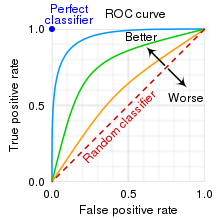

In the below example, the orange line corresponds to a classifer no better than random chance. An extremely effective classifier will have an ROC that hugs the upper left corner - it will correctly identify l ots of 1s without misclassifying lots of 0s and 1s. For this model, if we want a classifier with a specificity of at least 50%, then the recal is about 75%.

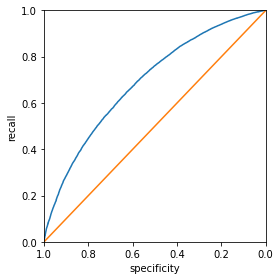

In [897]:
fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:, 0], 
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')


plt.tight_layout()
plt.show()

### AUC 

Area under curve (AUC) is the total area under the roc curve. An AUC of 1 indicates a perfect classifier; it gets all the 1s correctly classified, and it doesn't misclassify any 0s as 1s. A completely ineffective classifier (a diagonal line) will have an AUC of 0.5.

In [898]:
print(np.sum(roc_df.recall[:-1] * np.diff(1 - roc_df.specificity)))
print(roc_auc_score([1 if yi == 'default' else 0 for yi in y], logit_reg.predict_proba(X)[:, 0]))

0.691710795288669
0.6917108731135808


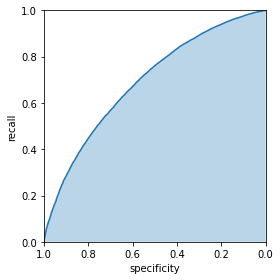

In [899]:
fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:,0], 
                                 pos_label='default')
roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})

ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
ax.set_ylim(0, 1)
ax.set_xlim(1, 0)
# ax.plot((1, 0), (0, 1))
ax.set_xlabel('specificity')
ax.set_ylabel('recall')
ax.fill_between(roc_df.specificity, 0, roc_df.recall, alpha=0.3)


plt.tight_layout()
plt.show()

## 11C - Strategies for imbalanced data

- Undersample - use fewer of the prevalent class
- Oversample - use more the rare class records, bootstrapping if necessary.
- Data Generation - like bootstrapping, except new records slightly different from its score

### 11CA - Undersampling

In [158]:
full_train_set = pd.read_csv(FULL_TRAIN_SET_CSV)
print(full_train_set.shape)
full_train_set.head(3)

(119987, 19)


status  loan_amnt       term  annual_inc    dti  payment_inc_ratio  \
0   Fully Paid       5000  36 months       24000  27.65            8.14350   
1  Charged Off       2500  60 months       30000   1.00            2.39320   
2   Fully Paid       2400  36 months       12252   8.72            8.25955   

   revol_bal  revol_util         purpose home_ownership  delinq_2yrs_zero  \
0    13648.0        83.7     credit_card           RENT                 1   
1     1687.0         9.4             car           RENT                 1   
2     2956.0        98.5  small_business           RENT                 1   

   pub_rec_zero  open_acc  grade   outcome  emp_length        purpose_ home_  \
0             1         3    5.4  paid off          11     credit_card  RENT   
1             1         3    4.8   default           1  major_purchase  RENT   
2             1         2    5.0  paid off          11  small_business  RENT   

    emp_len_  
0   > 1 Year  
1   > 1 Year  
2   > 1 Year

In this data set, only 19% of loans defaulted.

In [221]:
print('percentage of loans in default: ' +  str(100 * np.mean(full_train_set.outcome == 'default')))

percentage of loans in default: 18.894546909248504


Let's see how a trained model looks when this imbalanced data set is used. You will see that less than 1% were predicted to default.

The loans that were paid off overwhelm the loans in default because the model is trained using all the data equally. Thanking about it inuitively, the presence of so many nondefaulting loans, coupled with the inevitable variability in predicot rdata, means that, even for a defaulting loan, the model is likey to find some nondefualting loans that it is similar to, by chance. When a balanced sample was used, roughly 50% of loans were predicted to default.

One should undersample to improve the ratio of paid off and defaults.

In [224]:
predictors = ['payment_inc_ratio', 'purpose_', 'home_', 'emp_len_', 
              'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'
X = pd.get_dummies(full_train_set[predictors], prefix='', prefix_sep='', 
                   drop_first=True, dtype=int)
y = full_train_set[outcome]

full_model = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
full_model.fit(X, y)
#print('percentage of loans predicted to default: ', 
#print(      100 * np.mean(full_model.predict(X) == 'default')))

print('percentage of loans in default: ' +  str(100 * np.mean(full_model.predict(X) == 'default', dtype=np.float64)))

percentage of loans in default: 0.0


### 11CB - Oversampling and Up/Down Weighting

If you have a relatively small data set, then undersampling the class has risk of throwing out useful information. In this case, instead of downsampling the dominant class, you should oversample (upsample) the rarer class by drawing additional rows with replacement (bootstrapping).

You can achieve similar results by weighting the data. Many classification algorithms take a weight argument that will allow you to up/down weight the data. 

In the below example, weights for loans that default are set to 1/p (p= probability to default). The nondefaulting loans have a weight of 1. The sums  of the weights for defaulting loans and nondefaulting loans are roughly equal. The mean of the predicted values is now about 62% instead of 0.39%

In [957]:
default_wt = 1 / np.mean(full_train_set.outcome == 'default')
wt = [default_wt if outcome == 'default' else 1 for outcome in full_train_set.outcome]

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X, y, wt)

print('percentage of loans predicted to default (weighting): ' +  str(100 * np.mean(full_model.predict(X) == 'default')))

percentage of loans predicted to default (weighting): 61.43998933217766


### 11CC - Data Generation
SMOTE - Synthetic Minority Oversampling Technique

In [956]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print('percentage of loans in default (SMOTE resampled): ', 
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)
print('percentage of loans predicted to default (SMOTE): ', 
      100 * np.mean(full_model.predict(X) == 'default'))


X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print('percentage of loans in default (ADASYN resampled): ', 
      100 * np.mean(y_resampled == 'default'))

full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
full_model.fit(X_resampled, y_resampled)

print('percentage of loans predicted to default (ADASYN): ' +  str(100 * np.mean(full_model.predict(X) == 'default')))

percentage of loans in default (SMOTE resampled):  50.0
percentage of loans predicted to default (SMOTE):  29.591539083400704
percentage of loans in default (ADASYN resampled):  48.56040383751355
percentage of loans predicted to default (ADASYN): 27.33629476526624


### 11CD - Exploring Predictions

The region to the upper left of the lines corresponds to a predicted default. LDA and logistic linear regression give nearly identical results in this case. The tree model mproduces the least regular rule, with two steps. Finally, the GAM fit of the logistic regression represents a compromise between teh tree model and the lienar model.

In [958]:
loan3000 = pd.read_csv(LOAN3000_CSV)

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy', 
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)

loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(X, y)

logit_reg = LogisticRegression(penalty="l2", solver='liblinear')
logit_reg.fit(X, y)


## model
gam = LinearGAM(s(0) + s(1))
print(gam.gridsearch(X.values, [1 if yi == 'default' else 0 for yi in y]))

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + intercept, 
   tol=0.0001, verbose=False)


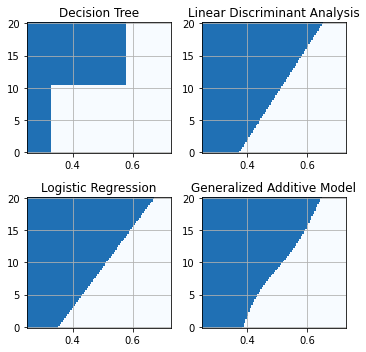

In [959]:
models = {
    'Decision Tree': loan_tree,
    'Linear Discriminant Analysis': loan_lda,
    'Logistic Regression': logit_reg,
    'Generalized Additive Model': gam,
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

xvalues = np.arange(0.25, 0.73, 0.005)
yvalues = np.arange(-0.1, 20.1, 0.1)
xx, yy = np.meshgrid(xvalues, yvalues)
X = pd.DataFrame({
    'borrower_score': xx.ravel(),
    'payment_inc_ratio': yy.ravel(),
})

boundary = {}

for n, (title, model) in enumerate(models.items()):
    ax = axes[n // 2, n % 2]
    predict = model.predict(X)
    if 'Generalized' in title:
        Z = np.array([1 if z > 0.5 else 0 for z in predict])
    else:
        
        Z = np.array([1 if z == 'default' else 0 for z in predict])
    Z = Z.reshape(xx.shape)
    boundary[title] = yvalues[np.argmax(Z > 0, axis=0)]
    boundary[title][Z[-1,:] == 0] = yvalues[-1]

    c = ax.pcolormesh(xx, yy, Z, cmap='Blues', vmin=0.1, vmax=1.3, shading='auto')
    ax.set_title(title)
    ax.grid(True)

plt.tight_layout()
plt.show()

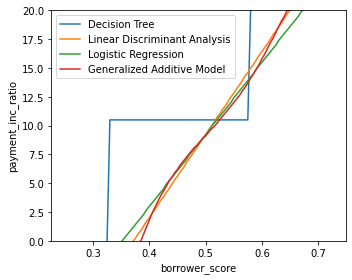

In [960]:
boundary['borrower_score'] = xvalues
boundaries = pd.DataFrame(boundary)

fig, ax = plt.subplots(figsize=(5, 4))
boundaries.plot(x='borrower_score', ax=ax)
ax.set_ylabel('payment_inc_ratio')
ax.set_ylim(0, 20)


plt.tight_layout()
plt.show()

# 12 - Statistical Machine Learning

The most successful and widely used techniques are based on ensemble learning applied to decision trees. The basic idea of ensemble learning is to use many models to form a prediction, as opposed to using a single model. Decision trees are a flexible and automatic technique to learn rules about the relationships between predictor variables and outcome variables. It turns out that the combination of ensemble learning with decision trees leads to some of the best performing off-the-shelf predictive modeling techniques.

## 12A - K-Nearest Neighbors Machine Learning Method

For each record to be classified or predicted:
1. Find K records that have similar features (i.e., similar predictor values).
2. For classification, find out what the majority class is among those similar records and assign that class to a new record.
3. For prediction (also called KNN regression), find the average amont those similar records, and predict that average for the new record.

All predictors must be in numeric form.

K typically is between 1-20, often odd numer is chosen to avoid ties. The smaller the signal-to-noise ratio, the higher the required K.

In [159]:
loan200 = pd.read_csv(LOAN200_CSV)
 
predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'


newloan = loan200.loc[0:0, predictors] #create unseen data
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
knn.predict(newloan)
print(knn.predict_proba(newloan))
print(knn.predict(newloan))

[[0.45 0.55]]
['paid off']


As per the figure below. The black circle shows the boundary of the nearest 20 points. In this case, 9 defaulted loans lie within the circle, as compared with 11 paid-off loans. Hence, the predicted outcome of the loan is paid off. Note that if we consider only three nearest neighbors, the prediction would be that the loan defaults.

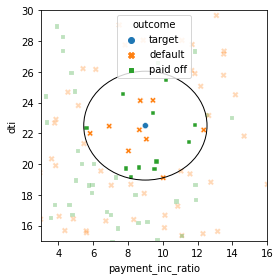

In [160]:
nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

## 12B -  Standardization (Normalization, Z-Scores)

In measurement, we are often no so much interested in "how much" but in "how different from the average". Standardization, also called normalization, puts all variables on similar scales by subtracting the mean and dividing by the standard deviation; in this way, we ensure that a variable does not overly influence a model simply due to the scale of its original measurement. The results of this transformation is commonly referred to as z-score. Measurements are then stated in terms of "standard deviations away from the mean".


For KKN and few other procedures, it is essential to standardize the data prior to applying the procedure.

In [161]:
"""BEFORE STANDARDIZATION"""
loan_data = pd.read_csv(LOAN_DATA_CSV)
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)


predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]
print(newloan)
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

nbrs = knn.kneighbors(newloan)
print(X.iloc[nbrs[1][0], :])

   payment_inc_ratio  dti  revol_bal  revol_util
0             2.3932  1.0       1687         9.4
       payment_inc_ratio   dti  revol_bal  revol_util
35536            1.47212  1.46       1686        10.0
33651            3.38178  6.37       1688         8.4
25863            2.36303  1.39       1691         3.5
42953            1.28160  7.14       1684         3.9
43599            4.12244  8.98       1684         7.2


In [981]:
classificationSummary(y, knn.predict(X), 
                      class_names=knn.classes_)

Confusion Matrix (Accuracy 0.7029)

         Prediction
  Actual  default paid off
 default    15815     6855
paid off     6618    16053


The revol_bal, which is in dollars, is a much bigger magnitude than that of the other variables. The revol_balc in these neigbors is very close to its value in the new record, but the other predictor variables are all over the map and essentiall play no role in determining neighbors.

Now compare this to KNN applied to the standardized data below. First step is to train (fit) the data and then transform the data. You will see that the predictor variables are much more consistent across the board and lead to increased accuracy.

In [984]:
"""AFTER STANDARDIZATION"""
newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
print(X.iloc[nbrs[1][0], :])

       payment_inc_ratio   dti  revol_bal  revol_util
2080             2.61091  1.03       1218         9.7
1438             2.34343  0.51        278         9.9
30215            2.71200  1.34       1075         8.5
28542            2.39760  0.74       2917         7.4
44737            2.34309  1.37        488         7.2


In [985]:
classificationSummary(y, knn.predict(X_std), 
                      class_names=knn.classes_)

Confusion Matrix (Accuracy 0.7095)

         Prediction
  Actual  default paid off
 default    16098     6572
paid off     6601    16070


## KNN as a Feature Engine (MAY DELETE)

In [990]:
(MAY DELETE)

loan_data = pd.read_csv(LOAN_DATA_CSV)
loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 
              'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)
plt.scatter(range(len(X)), [bs + random.gauss(0, 0.015) for bs in knn.predict_proba(X)[:,0]], 
            alpha=0.1, marker='.')
knn.predict_proba(X)[:, 0]

loan_data['borrower_score'] = knn.predict_proba(X)[:, 0]
print(loan_data['borrower_score'].describe())

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3594702653.py, line 1)

## 12C - Decision Tree Classification  Machine Learning Method

The most widely used and powerful predictive modeling tools in data science for regression and classification.

A tree model is a set of "if-then-else" rules that are easy to understand and to implement. In contrast to linear and logistic regression, tress have the ability to discover hidden patterns corresponding to complex interactions in the data. However, unlike KNN or naive Bayes, simple tree models can be expressed in terms of predictor relationships that are easility interpretable.

As the tree grows bigger, the splitting rules become more detailed and the tree gradually shifts from identifying "big" rules that identiy real and reliable relationships in the data to "tiny" rules that reflect only noise. 

Avoid splitting a partition if a results usbpartition is too small or if a terminal leaf is too small. Don't split a partiion if the new partition does not "significantly" reduce the impurity. 

In [297]:
loan3000 = pd.read_csv(LOAN3000_CSV)

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)

#NOT WORKING
#plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003,
                       random_state=1)

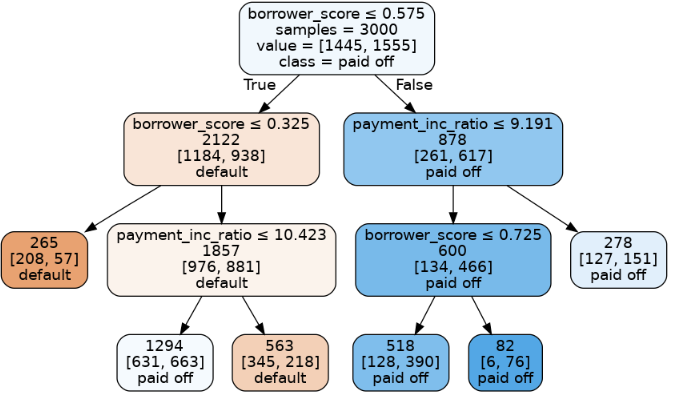

In [298]:
classificationSummary(y, loan_tree.predict(X), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.6110)

         Prediction
  Actual  default paid off
 default      553      892
paid off      275     1280


In [299]:
"""TEXT VERSION OF THE DECISION TREE"""
print(textDecisionTree(loan_tree))

node=0 test node: go to node 1 if 0 <= 0.5750000178813934 else to node 6
  node=1 test node: go to node 2 if 0 <= 0.32500000298023224 else to node 3
    node=2 leaf node: [[0.785, 0.215]]
    node=3 test node: go to node 4 if 1 <= 10.42264986038208 else to node 5
      node=4 leaf node: [[0.488, 0.512]]
      node=5 leaf node: [[0.613, 0.387]]
  node=6 test node: go to node 7 if 1 <= 9.19082498550415 else to node 10
    node=7 test node: go to node 8 if 0 <= 0.7249999940395355 else to node 9
      node=8 leaf node: [[0.247, 0.753]]
      node=9 leaf node: [[0.073, 0.927]]
    node=10 leaf node: [[0.457, 0.543]]


### The Recursive Partitioning Algorithm

Below is a visual of how the predictors are partitioned.

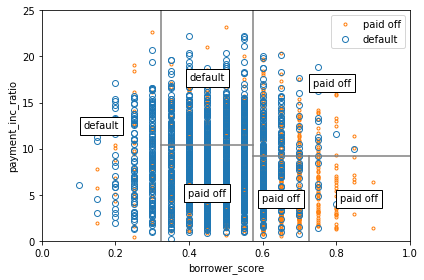

In [1023]:
fig, ax = plt.subplots(figsize=(6, 4))

loan3000.loc[loan3000.outcome=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
loan3000.loc[loan3000.outcome=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

x0 = 0.575
x1a = 0.325; y1b = 9.191
y2a = 10.423; x2b = 0.725
ax.plot((x0, x0), (0, 25), color='grey')
ax.plot((x1a, x1a), (0, 25), color='grey')
ax.plot((x0, 1), (y1b, y1b), color='grey')
ax.plot((x1a, x0), (y2a, y2a), color='grey')
ax.plot((x2b, x2b), (0, y1b), color='grey')

labels = [('default', (x1a / 2, 25 / 2)),
          ('default', ((x0 + x1a) / 2, (25 + y2a) / 2)),
          ('paid off', ((x0 + x1a) / 2, y2a / 2)),
          ('paid off', ((1 + x0) / 2, (y1b + 25) / 2)),
          ('paid off', ((1 + x2b) / 2, (y1b + 0) / 2)),
          ('paid off', ((x0 + x2b) / 2, (y1b + 0) / 2)),
         ]
for label, (x, y) in labels:
    ax.text(x, y, label, bbox={'facecolor':'white'},
            verticalalignment='center', horizontalalignment='center')

plt.tight_layout()
plt.show()

### Measuring Homogeneity or Impurity

Tree models create partitions that predict an outcome. It is necessary to measure the 'purity' within a partition or equivalently measure the 'impurity'. The accuracy of the predictions is the proportion p of misclassified recoards within that partition. Accuracy isn't a good measure for impurity. Gini impurity and entory of information are the correct goals.

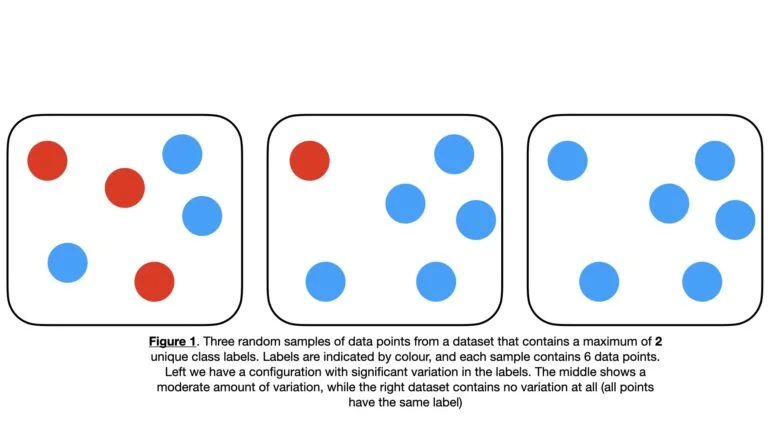

In [300]:
def entropyFunction(x):
    if x == 0: return 0
    return -x * math.log(x, 2) - (1 - x) * math.log(1 - x, 2)

def giniFunction(x):
    return x * (1 - x)

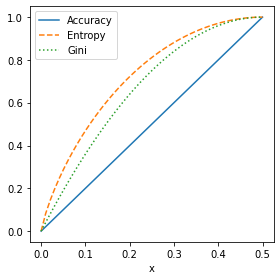

In [301]:
"""MAY DELETE"""
x = np.linspace(0, 0.5, 50)
impure = pd.DataFrame({
    'x': x,
    'Accuracy': 2 * x,
    'Gini': [giniFunction(xi) / giniFunction(.5) for xi in x],
    'Entropy': [entropyFunction(xi) for xi in x],
})

fig, ax = plt.subplots(figsize=(4, 4))

impure.plot(x='x', y='Accuracy', ax=ax, linestyle='solid')
impure.plot(x='x', y='Entropy', ax=ax, linestyle='--')
impure.plot(x='x', y='Gini', ax=ax, linestyle=':')

plt.tight_layout()
plt.show()

##  12D - Bagging and the Random Forest Machine Learning Model

Harnessing the results from the multiple trees is typically more powerful than using just a single tree. Averaging (or taking majority votes) of multiple models - an ensemble of models - turns out to be more accurate than just selecting one model.

The simple version of ensembles is as follows:
1. Develop a predictive model and record the predictions for a given data set.
2. Repeat for multiple models on the same data.
3. For each record to be predicted, take an average (or a weighted average, or a majority vote) of the predictions. 

There are two main variants of ensemble models: bagging and boosting. In the case of ensemble tree models, these are referred to as random forest models and boosted tree models.

Bagging fits each new model with a new bootstrap resample. Decision trees are very easy as compared to the random forest. A decision tree combines some decisions, whereas a random forest combines several decision trees. Thus, it is a long process, yet slow. Whereas, a decision tree is fast and operates easily on large data sets, especially the linear one

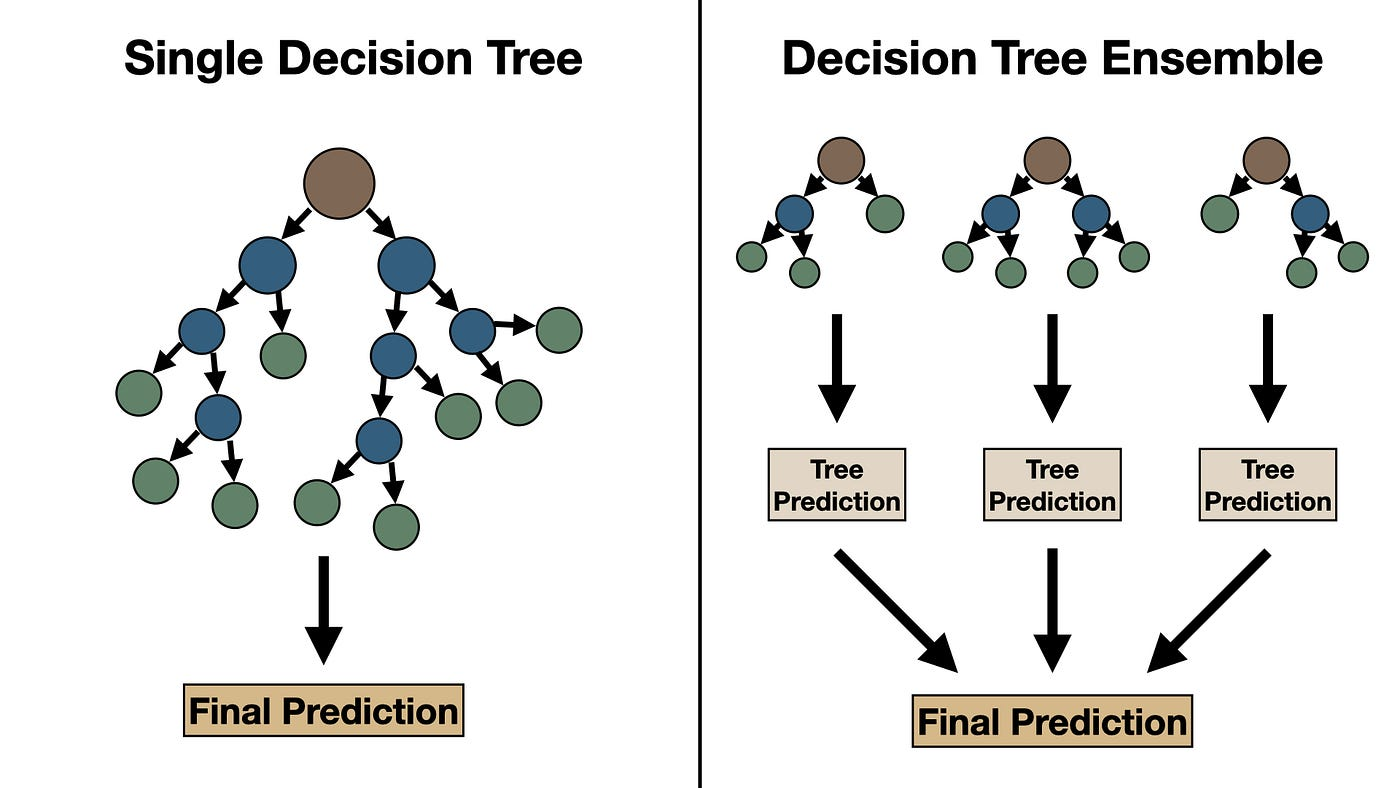

Compare the results of a Random Forest Classifier vs a Single Decision Tree Classifier. NOTE: The extremely high values for random forest classifier is due to over fitting. You can see how the results differ after test-train-split is applied.

In [302]:
"""Random Forest Classifier"""
loan3000 = pd.read_csv(LOAN3000_CSV)
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                            oob_score=True)
rf.fit(X, y)
print(rf.oob_decision_function_)

[[0.18131868 0.81868132]
 [0.26704545 0.73295455]
 [0.93333333 0.06666667]
 ...
 [1.         0.        ]
 [0.73157895 0.26842105]
 [0.68085106 0.31914894]]


In [1054]:
#rf.predict(valid_X)

In [303]:
classificationSummary(y, rf.predict(X), 
                      class_names=rf.classes_)

Confusion Matrix (Accuracy 0.9987)

         Prediction
  Actual  default paid off
 default     1442        3
paid off        1     1554


In [337]:
"""Single Decision Tree Classifier"""
loan3000 = pd.read_csv(LOAN3000_CSV)

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)
loan_tree.fit(X, y)

#NOT WORKING
#plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003,
                       random_state=1)

In [338]:
classificationSummary(y, loan_tree.predict(X), 
                      class_names=rf.classes_)

Confusion Matrix (Accuracy 0.6110)

         Prediction
  Actual  default paid off
 default      553      892
paid off      275     1280


See the dependences on the features:

In [349]:
pd.DataFrame({'features': loan_tree.feature_names_in_, 'importance': loan_tree.feature_importances_})

features  importance
0     borrower_score    0.778627
1  payment_inc_ratio    0.221373

Repeat results with train_test_split to demonstrate overfitting

In [306]:
 train_X, test_X, train_y, test_y = train_test_split(X, y)

In [307]:
"""Single Decision Tree Classifier"""
loan3000 = pd.read_csv(LOAN3000_CSV)

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

train_X, test_X, train_y, test_y = train_test_split(X, y)

loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                   min_impurity_decrease=0.003)
loan_tree.fit(train_X, train_y)

#NOT WORKING
#plotDecisionTree(loan_tree, feature_names=predictors, class_names=loan_tree.classes_)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.003,
                       random_state=1)

In [310]:
classificationSummary(test_y, loan_tree.predict(test_X), 
                      class_names=loan_tree.classes_)

Confusion Matrix (Accuracy 0.6027)

         Prediction
  Actual  default paid off
 default      197      156
paid off      142      255


alternative method for accuracy score

In [311]:
metrics.accuracy_score(test_y, loan_tree.predict(test_X))

0.6026666666666667

In [312]:
"""Random Forest Classifier"""
loan3000 = pd.read_csv(LOAN3000_CSV)
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                            oob_score=True)
rf.fit(train_X, train_y)
print(rf.oob_decision_function_)

[[0.32967033 0.67032967]
 [0.47727273 0.52272727]
 [0.63535912 0.36464088]
 ...
 [0.71195652 0.28804348]
 [0.08994709 0.91005291]
 [0.25       0.75      ]]


In [313]:
classificationSummary(test_y, rf.predict(test_X), 
                      class_names=rf.classes_)

Confusion Matrix (Accuracy 0.5947)

         Prediction
  Actual  default paid off
 default      200      153
paid off      151      246


This is confirmed with the below figures. By default 500 trees were trained. Out of Bag (OOB) esitmate of error is the error rate for trained models, applied to the data left out the training set for that tree. 

In [1074]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, 
                                criterion='entropy', max_depth=5,
                                random_state=1, oob_score=True)
    rf.fit(X, y)
    oobScores.append(rf.oob_score_)

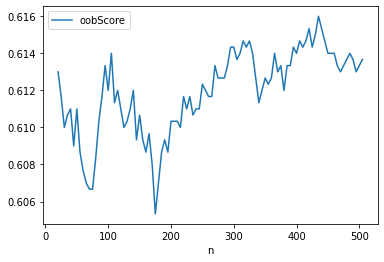

In [1075]:
pd.DataFrame({
    'n': n_estimator, 
    'oobScore': oobScores
}).plot(x='n', y='oobScore')
plt.show()

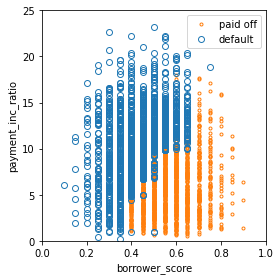

In [1077]:
predictions = X.copy()
predictions['prediction'] = rf.predict(X)
predictions.head()

fig, ax = plt.subplots(figsize=(4, 4))

predictions.loc[predictions.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.',
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
predictions.loc[predictions.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o',
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

### Variable importance - How to identify most important features

The power of the random forest algorithm shows itself when you build predictive models for data with many features and records. It has the ability to automatically determine which predictors are important and discover complex relationships between predictors corresponding to interaciton terms.

In [314]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True, dtype=int)
y = loan_data[outcome]

rf_all = RandomForestClassifier(n_estimators=500, random_state=1)
rf_all.fit(X, y)

rf_all_entropy = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
print(rf_all_entropy.fit(X, y))

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=1)


In [315]:
rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)
 
# crossvalidate the scores on a number of different random splits of the data
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                          test_size=0.3)
    rf.fit(train_X, train_y)
    acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
        scores[column].append((acc-shuff_acc)/acc)
print('Features sorted by their score:')
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.0734, 'borrower_score'), (0.0401, 'grade'), (0.0304, 'term_60 months'), (0.0106, 'payment_inc_ratio'), (0.0089, 'annual_inc'), (0.0042, 'dti'), (0.0027, 'revol_bal'), (0.0027, 'purpose_credit_card'), (0.0024, 'purpose_small_business'), (0.0024, 'open_acc'), (0.0021, 'purpose__small_business'), (0.0016, 'home__RENT'), (0.0011, 'delinq_2yrs_zero'), (0.0008, 'purpose__other'), (0.0008, 'purpose__debt_consolidation'), (0.0005, 'purpose_house'), (0.0003, 'purpose_wedding'), (0.0003, 'purpose__home_improvement'), (0.0002, 'purpose_debt_consolidation'), (0.0002, 'purpose__major_purchase'), (0.0002, 'home__OWN'), (0.0001, 'purpose_vacation'), (0.0001, 'purpose_medical'), (0.0001, 'purpose_home_improvement'), (0.0, 'purpose__medical'), (0.0, 'emp_len__ > 1 Year'), (-0.0001, 'purpose_moving'), (-0.0001, 'purpose_major_purchase'), (-0.0007, 'emp_length'), (-0.0008, 'purpose_other'), (-0.0008, 'pub_rec_zero'), (-0.0013, 'revol_util'), (-0.0024, 'loan_amnt')]


Text(0.5, 0, 'Feature Importance')

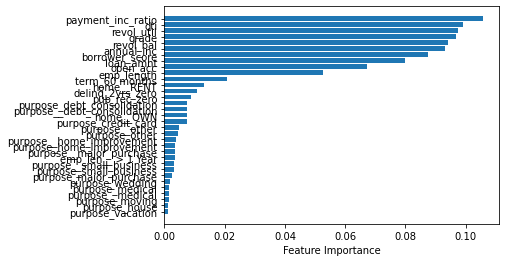

In [334]:
sort = rf_all.feature_importances_.argsort()

plt.barh(rf_all.feature_names_in_[sort], rf_all.feature_importances_[sort])

plt.xlabel("Feature Importance")

Left and Right tables are Accuracy Decrease and Gini Decrease. It displays the order of feature importance.

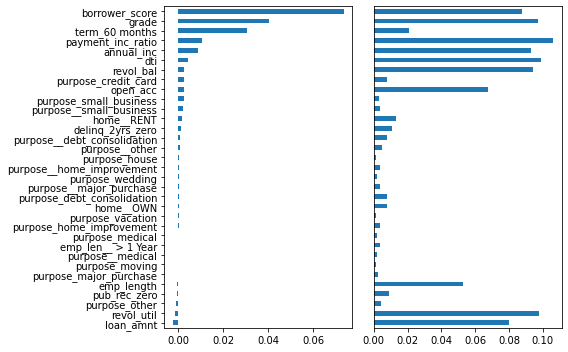

In [316]:
importances = rf_all.feature_importances_

df = pd.DataFrame({
    'feature': X.columns, 
    'Accuracy decrease': [np.mean(scores[column]) for column in 
                         X.columns],
    'Gini decrease': rf_all.feature_importances_, 
    'Entropy decrease': rf_all_entropy.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease', 
             legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', 
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

## 12E - XGBoost Machine Learning Method

Like bagging, boosting is often used with decision trees. Bagging is reliable and steady, boosting is powerful and requires more care.

It increases the weights for the observations that were misclassified, the algorithm forces the models to train more heavily on the data for which it performed poorly.

Xgboost has many parameters that can and should be adjusted. Two very important parameters are subsample, which controls the fraction of observations  that should be sampled at each iteration and eta (also referred to as learning rate, a shrinkage factor that helps prevent overfitting.

Important parmeters:
1. Subsample - Sample without replacement. The subsample parameter controls the fraction of observations used for each tree. A smaller subsample value results in smaller and less complex models, which can help prevent overfitting. A larger subsample value results in larger and more complex models, which can lead to overfitting. Default value is 1.0


2. ETA/Learning rate -  denoted as α, simply means how fast the model learns. Each tree added modifies the overall model. The magnitude of the modification is controlled by learning rate. This hyperparameter controls how much of a contribution each new estimator will make to the ensemble prediction. Default value for noisy data is 0.3; python default value is 0.1


3. n_estimators - The n_estimators parameter controls the number of trees in the model. Increasing this value generally improves model performance, but can also lead to overfitting. A common value for this parameter is between 100 and 1000.


4. alpha - L1 regularization, also known as Lasso regularization, is a technique commonly used in machine learning and statistics to prevent overfitting and improve the interpretability of models. It achieves this by adding a penalty term to the loss function, based on the L1 norm of the coefficient vector. Default value is 0.


5. lambda - L2 regularization balances the trade-off between model complexity and training data fit. By penalizing large coefficients, it encourages the model to select features that have a more significant impact on prediction, while minimizing the influence of less relevant or noisy features. Default value is 0.

6. max_depth - The maximum depth of trees. Default value is 6. In contrast to the random forest, which fits very deep trees, boosting usually fits shallow trees. This has an advantage of avoid very complex interractions in the model that can arrise from noisy data.

In [1087]:
predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = pd.Series([1 if o == 'default' else 0 for o in loan3000[outcome]])

xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                    use_label_encoder=False, eval_metric='error')
print(xgb.fit(X, y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [1088]:
xgb_df = X.copy()
xgb_df['prediction'] = ['default' if p == 1 else 'paid off' for p in xgb.predict(X)]
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]
print(xgb_df.head())

   borrower_score  payment_inc_ratio prediction  prob_default
0            0.40            5.11135   paid off      0.586677
1            0.40            5.43165    default      0.307408
2            0.70            9.23003    default      0.337050
3            0.40            2.33482   paid off      0.861774
4            0.45           12.10320    default      0.056794


You will notice that the accuracy of this model is more-or-less than same as random forest models.

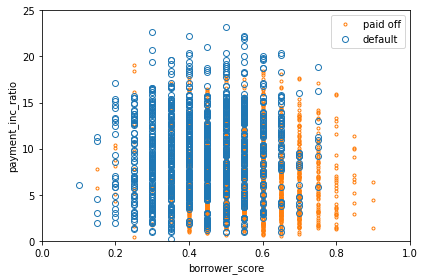

In [1089]:
fig, ax = plt.subplots(figsize=(6, 4))

xgb_df.loc[xgb_df.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
xgb_df.loc[xgb_df.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

### Regularization: Avoiding Overfitting

Any modeling technique is potentially prone to overfitting. For example, if too many variables are included in a regression equation, the model may end up with a spurious predictions. However, for most statistical techniques, overfitting can be avoided by a judicious selection of predictor variables. Even the random forest generally produces a reasonable model without tuning the parameters

In [1091]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True, dtype=int)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=0, learning_rate=0.3, subsample=1,
                            use_label_encoder=False, eval_metric='error')
xgb_default.fit(train_X, train_y)

xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=1000, learning_rate=0.1, subsample=0.63,
                            use_label_encoder=False, eval_metric='error')

print(xgb_penalty.fit(train_X, train_y))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


Below is another example of overfitting. Predicting the training set only has 10% error but predicting unseen data has 36% error. Modifying the parameters lead to slight improvment from 36& to 33% error.

In [1092]:
pred_default = xgb_default.predict_proba(train_X)[:, 1]
error_default = abs(train_y - pred_default) > 0.5
print('default (train): ', np.mean(error_default))

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

default (train):  0.10225793673249958
default:  0.3598
penalty:  0.3236


Comparing the methods:

In [1108]:
results = []
for ntree_limit in range(1, 250):
    iteration_range = [1, ntree_limit + 1]
    train_default = xgb_default.predict_proba(train_X, iteration_range=iteration_range)[:, 1]
    train_penalty = xgb_penalty.predict_proba(train_X, iteration_range=iteration_range)[:, 1]
    pred_default = xgb_default.predict_proba(valid_X, iteration_range=iteration_range)[:, 1]
    pred_penalty = xgb_penalty.predict_proba(valid_X, iteration_range=iteration_range)[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(valid_y - pred_default) > 0.5),
        'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

results = pd.DataFrame(results)
print(results.head())

   iterations  default train  penalty train  default test  penalty test
0           1       0.337304       0.339709        0.3510        0.3479
1           2       0.331136       0.339483        0.3422        0.3437
2           3       0.324090       0.339964        0.3397        0.3477
3           4       0.321883       0.340388        0.3389        0.3436
4           5       0.319761       0.340105        0.3355        0.3458


A visual example of overfitting:

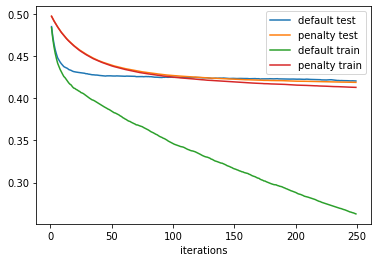

In [1110]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

### Hyperparameters and Cross-Validation

Cross-validation randomly splits up the data into K different groups, also called folds. For each fold, a model is trained on the data not in the fold and then evaluated on the data in the fold. This yields a measure of accuracy of the model on out-of-sample data.

In the example below, we apply various values of parameters to see the optimal output.

In [1112]:
idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
    xgb = XGBClassifier(objective='binary:logistic', n_estimators=250, 
                        max_depth=max_depth, learning_rate=eta,
                        eval_metric='error')
    cv_error = []
    for k in range(5):
        fold_idx = idx == k
        train_X = X.loc[~fold_idx]; train_y = y[~fold_idx]
        valid_X = X.loc[fold_idx]; valid_y = y[fold_idx]

        xgb.fit(train_X, train_y)
        pred = xgb.predict_proba(valid_X)[:, 1]
        cv_error.append(np.mean(abs(valid_y - pred) > 0.5))
    error.append({
        'eta': eta,
        'max_depth': max_depth,
        'avg_error': np.mean(cv_error)
    })
    print(error[-1])
errors = pd.DataFrame(error)
print(errors)

{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.32873558153818505}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.33625544058163137}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.34910369631558}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.3402457430887821}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.3728620469115286}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.373663636107758}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.35360948594072106}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.38542061555597606}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.380291413166153}
   eta  max_depth  avg_error
0  0.1          3   0.328736
1  0.1          6   0.336255
2  0.1          9   0.349104
3  0.5          3   0.340246
4  0.5          6   0.372862
5  0.5          9   0.373664
6  0.9          3   0.353609
7  0.9          6   0.385421
8  0.9          9   0.380291


In [1113]:
print(errors.pivot_table(index='eta', columns='max_depth', values='avg_error') * 100)

max_depth          3          6          9
eta                                       
0.1        32.873558  33.625544  34.910370
0.5        34.024574  37.286205  37.366364
0.9        35.360949  38.542062  38.029141


# 13 UNSUPERVISED LEARNING

Extracts meaning from data without training a model on labeled data (data where an outcome of interest is known). Supervised Learning takes predictor variables to predict a response variable. Unsupervised learning does not distinguish between response variable and predictor variables.

In some cases, the goal may be to reduce the dimensions by understanding the interaction between the variables.

## 13A - Principal Components Analysis (PCA) Unsupervised Learning Method

Often, variables will vary together (covary), and some of the variation in one is actually duplicated in another (for example, restaurant checks and tips). PCA is a technique to discover the way in which numberic variables covary.

Cannot be used for categorical data.

The idea in PCA is to combine multiple numeric predictor variables into a smaller set of variables, which are weighted linear combinations of the original set. The smaller set of variables, the principal components, explains most of the variability of the full set of variables thus reducing the dimension of the data. The weights used to form the principal components reveal teh releative contributions of the original variables to the new principal components.

The full process is as follows:

1. In creating the first principal component. PCA arrives at the linear combination of predictor variables that maximizes the percent total variance explained.  


2. The linear combination then become the first "new" predictor, Z1.


3. PCA repeats this process, using the same variables with different weight to create a second new predictor, Z2. The weighting is done such that Z1 and Z2 are uncorrelated.


4. The process continues until you have as many new variables, or components as the original predictor variables.


5. Choose to retain as many components as are needed to account for most of the variance.


6. The result so far is a set of weights for each component. The final step is to convert the original data into new principal component scores by applying the weights to the original values. These new scores can then be used as the reduced set of predictor variables.

In [350]:
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
oil_px = sp500_px[['XOM', 'CVX']]
print(oil_px.head(3))

                 XOM       CVX
1993-01-29 -0.016991  0.072921
1993-02-01  0.016991  0.102089
1993-02-02  0.084954  0.029168


The weights for CVX and XOM for the first principal component are 0.747 and -0.665 and for the second component they are -0.655 and 0.747. How to interpret this? The first principal component is essentially an average of CVX and XOM reflecting the correlation between the two energy companies. The second princial compoennt measures when the stock prices of CVX and XOM diverge.

Notice how there is no y value since the method is unsupervised.

In [351]:
pcs = PCA(n_components=2) #NOTE: # components cannot exceed # of features
pcs.fit(oil_px)
loadings = pd.DataFrame(pcs.components_, columns=oil_px.columns, index=oil_px.columns)
print(loadings)

          XOM       CVX
XOM -0.664711 -0.747101
CVX  0.747101 -0.664711


Below is a visual. The dashed liens show the direction of two principal components: the first one is along the long axis of teh ellipse, and the second one is along the short axis. You can see that a majority of the variability in the two stock returns is explained by the first principal component. This makes sense since energy stock prices tend to move as a group.

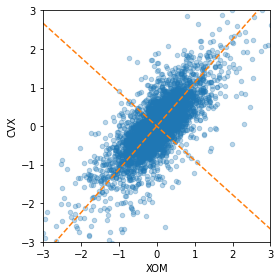

In [1130]:
def abline(slope, intercept, ax):
    """Calculate coordinates of a line based on slope and intercept"""
    x_vals = np.array(ax.get_xlim())
    return (x_vals, intercept + slope * x_vals)

ax = oil_px.plot.scatter(x='XOM', y='CVX', alpha=0.3, figsize=(4, 4))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.plot(*abline(loadings.loc[0, 'CVX'] / loadings.loc[0, 'XOM'], 0, ax),
        '--', color='C1')
ax.plot(*abline(loadings.loc[1, 'CVX'] / loadings.loc[1, 'XOM'], 0, ax),
        '--', color='C1')

plt.tight_layout()
plt.show()

### Interpreting Principal Components 

One can observe that the variance of the first principal component is quite large (which is common) but the other top principal components are significant as well.

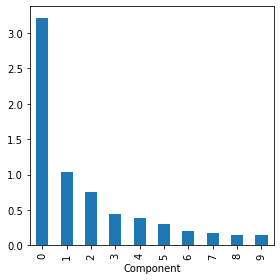

In [1131]:
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP',
        'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]

sp_pca = PCA()
sp_pca.fit(top_sp)

explained_variance = pd.DataFrame(sp_pca.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

It can be especially revealing to plot the weights of the top principal components

In [1135]:
loadings = pd.DataFrame(sp_pca.components_[0:5, :], 
                        columns=top_sp.columns)
print(loadings)

       AAPL       AXP       COP      COST      CSCO       CVX        HD  \
0 -0.300825 -0.246332 -0.261529 -0.273634 -0.064059 -0.444490 -0.207983   
1 -0.505116 -0.139426  0.174212 -0.416307 -0.031939  0.289373 -0.278002   
2 -0.786730  0.135458 -0.002367  0.465862 -0.007524  0.082374  0.166320   
3 -0.120586  0.061814 -0.206026  0.092596  0.003904 -0.577665  0.162814   
4  0.111576 -0.596666 -0.005813  0.555529 -0.039860  0.109016 -0.185488   

       INTC       JPM      MSFT       SLB       TGT       USB       WFC  \
0 -0.076956 -0.196397 -0.105012 -0.481786 -0.148833 -0.116421 -0.145684   
1 -0.033898 -0.040723 -0.053954  0.472494 -0.228123 -0.054796 -0.047427   
2 -0.003518  0.062261  0.016248 -0.194822  0.160833  0.048976  0.041932   
3 -0.001605  0.057687 -0.012558  0.680914  0.109895  0.016752  0.018614   
4 -0.072047 -0.385160 -0.077135  0.181332 -0.055557 -0.155440 -0.216425   

        WMT       XOM  
0 -0.122304 -0.317952  
1 -0.222889  0.154192  
2  0.175806  0.090167  
3 

The loadings for there top five components are shown below. The loadings for the first principal component have the same sign: this is typical for data in which all columns share the same factor( in this case, the overall stock market trend). The second component captures the prices changes of energy stocks as compared to other stocks. The third component is primarily a contrast of AAPL and COST. The fourth component contrasts the movements of SLB to other energy stocks. The fifth component is mostly dominated by financial companies.

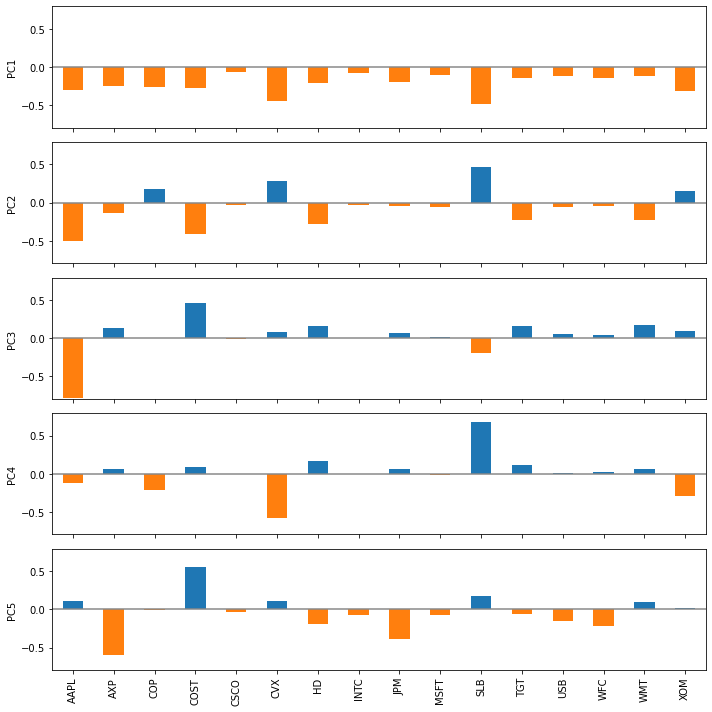

In [1142]:
maxPC = 1.01 * loadings.loc[0:5, :].abs().to_numpy().max()

f, axes = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

## 13B - Correspondence Analysis 

PCA cannot be used for categorical data; however, a somewhat related technique is correspondance analysis. The goal is to recognize the associations between categories, or between categorical features. This analysis is mainly used for graphical analysis. The main value of this analysis to to graphically display variables that are associated with one another by the proximity of the plot.

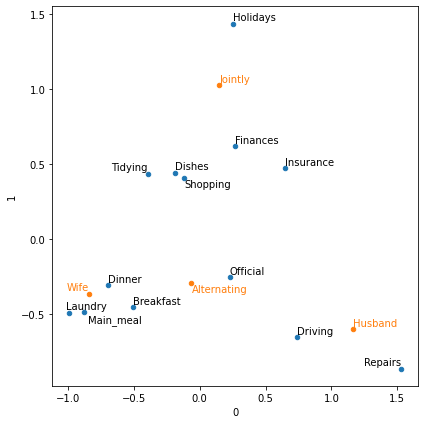

In [1147]:
from adjustText import adjust_text

housetasks = pd.read_csv(HOUSE_TASKS_CSV, index_col=0)

ca = prince.CA(n_components=2)
ca = ca.fit(housetasks)

ax = ca.row_coordinates(housetasks).plot.scatter(x=0, y=1, figsize=(6,6))
ca.column_coordinates(housetasks).plot.scatter(x=0, y=1, ax=ax, c='C1')
texts = []
for idx, row in ca.row_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx))
for idx, row in ca.column_coordinates(housetasks).iterrows():
    texts.append(plt.text(row[0], row[1], idx, color='C1'))
adjust_text(texts, only_move={'points':'y', 'texts':'y'}) 
plt.tight_layout()
plt.show()

## 13C - K-Means Clustering Unsupervised Learning Method
Clustering is a technique to divide data into different groups, where the records in each group are similar to one another. A goal of clustering is to identify significant meaningful groups of data. The groups can be used directly, analyzed in more depth, or passed as a feature or an outcome to a predictive regression or classification model.

KNN is a supervised learning algorithm mainly used for classification problems, whereas K-Means (aka K-means clustering) is an unsupervised learning algorithm. K in K-Means refers to the number of clusters, whereas K in KNN is the number of nearest neighbors (based on the chosen distance metric).

NOTE: You must know in advance an inclination of the clusters

A typical use of clusting is to locate natural, separate clusters in the data. Another application is to divide the data into a predetermined number of separate groups, where clustering is used to ensure the groups are as different as possible from one another. 

In the example below using stock data, you will notice that the 2nd and 4th row are in the same cluster as this represents a 'down' market.

In [352]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
kmeans = KMeans(n_clusters=4).fit(df)
df['cluster'] = kmeans.labels_
print(df.head())

                 XOM       CVX  cluster
2011-01-03  0.736805  0.240681        3
2011-01-04  0.168668 -0.584516        1
2011-01-05  0.026631  0.446985        3
2011-01-06  0.248558 -0.919751        1
2011-01-07  0.337329  0.180511        3


Below are the mean coordinates of the cluster.

In [1183]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['XOM', 'CVX'])
print(centers)

        XOM       CVX
0 -1.147328 -1.763619
1  0.237385  0.332404
2  0.956863  1.370889
3 -0.331907 -0.574314


Below are the is a visualization.

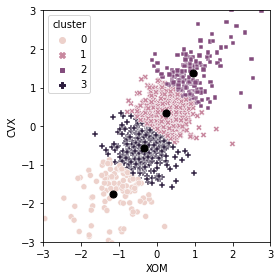

In [1185]:
fig, ax = plt.subplots(figsize=(4, 4))
ax = sns.scatterplot(x='XOM', y='CVX', hue='cluster', style='cluster', 
                     ax=ax, data=df)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
centers.plot.scatter(x='XOM', y='CVX', ax=ax, s=50, color='black')

plt.tight_layout()
plt.show()

In [1186]:
"""MIGHT DELETE"""
syms = sorted(['AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 'SLB', 'COP', 
               'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST'])
top_sp = sp500_px.loc[sp500_px.index >= '2011-01-01', syms]
kmeans = KMeans(n_clusters=5).fit(top_sp)

### Interpreting the Clusters

An important part of cluster analysis can involve the interpretation of the clusters. The two most important outputs from kemans are the sizes of the clusters and the cluster means.

#### How to get cluster sizes:

In [360]:
from collections import Counter
print(Counter(kmeans.labels_))

Counter({2: 13882, 0: 7543, 1: 1194, 3: 52})


The below plot reveals the nature of each cluster. For example, cluster 3 and 5 correspond to days on which the market is down and up, respectively. Clusters 1 and 4 are up and down days for consumer and energy stocks.

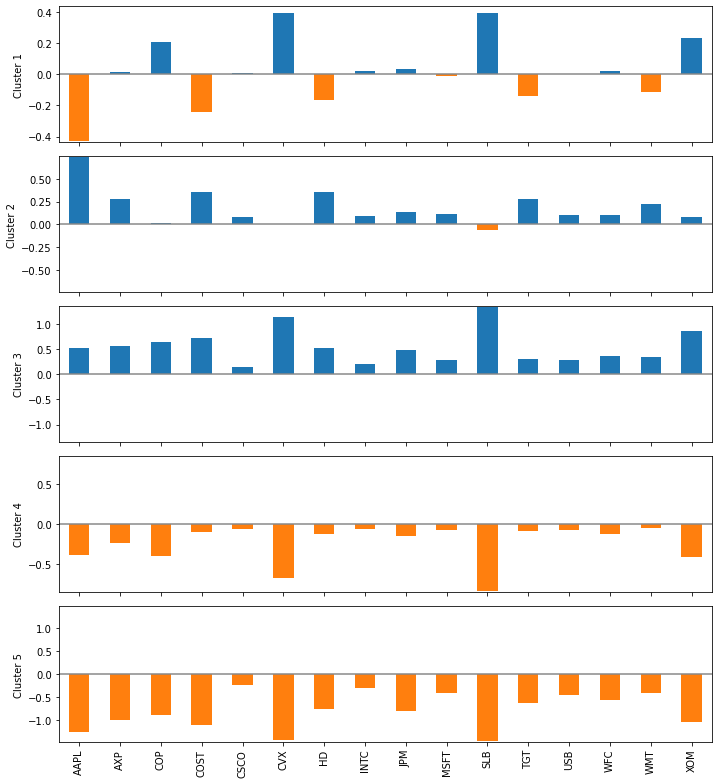

In [1189]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=syms)

f, axes = plt.subplots(5, 1, figsize=(10, 11), sharex=True)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i + 1}')
    ax.set_ylim(-maxPC, maxPC)

plt.tight_layout()
plt.show()

### Selecting the Number of Clusters

K-means requires that you specify the number of clusters K. When possible real world logic and common knowledge should be used to approximate the clusters. In absence of common knowledge, tehre is no single standard method to find the 'best' number of clusters.

A common approcah, called the elbow method, is to identify when the set of clusters explains most of the variance in the data. Adding enw clusters beyond this set contributes relatively little in the variance explained. The elbow is the point where the cumulative variance explained flattens out after rising steeply. 

In python, the property interia gives us the information to apply the elbow method.

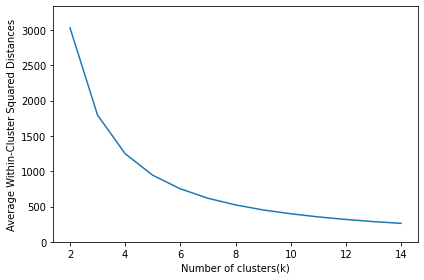

In [1190]:
inertia = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(top_sp)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(2, 15), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

## 13D - Hierarchical Clustering

An alternative to K-Means that can yield very different clusters. It allows the uswer to visualize the effect of specifying different numbers of clusters. It's main advantage is the intuitive graphical display leading to easier interpretation of the clusters. This is good for approximating the number of clusters when the quanitty is unknown.

In constrast to K-means, it is not necessary to prespecify the number of clusters. Graphically

Most used for small data sets. It requres intensive computing resources so does not scale well with large data sets.

Hierarchial clustering works on a data set with n records and p variables and is based on two basic building blocks:

1. A distance metric to measure the distance between two records.

2. A dissimilarity metric to measure the different between two clusters based on the distance metric between the memebers of each cluster.

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [353]:
syms1 = ['AAPL', 'AMZN', 'AXP', 'COP', 'COST', 'CSCO', 'CVX', 'GOOGL', 'HD', 
         'INTC', 'JPM', 'MSFT', 'SLB', 'TGT', 'USB', 'WFC', 'WMT', 'XOM']
df = sp500_px.loc[sp500_px.index >= '2011-01-01', syms1].transpose()

Z = linkage(df, method='complete')
print(Z.shape)

(17, 4)


In [358]:
len(syms1)

18

The leaves of the tree correspond to the records. The length of the branch in the tree indicates the degree of dissimilarity between corresponding clusters. The returns for Google and Amazon are quite dissimilar to one another and to the returns for other stocks. The oil stocks are in their own clusters and AAPL is by itself.

Imagine a horizontial line that moves up and down. Starting from the top and moving downward, every time a vertical line intersects with the horizontal line, that is an addition of a cluster.

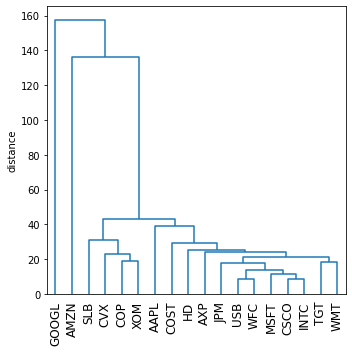

In [1194]:
fig, ax = plt.subplots(figsize=(5, 5))
dendrogram(Z, labels=list(df.index), color_threshold=0)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

plt.tight_layout()
plt.show()

Below is a printed list of the clusters

In [1208]:
memb = fcluster(Z, 4, criterion='maxclust')
memb = pd.Series(memb, index=df.index)
for key, item in memb.groupby(memb):
    print(f"{key} : {', '.join(item.index)}")

1 : COP, CVX, SLB, XOM
2 : AAPL, AXP, COST, CSCO, HD, INTC, JPM, MSFT, TGT, USB, WFC, WMT
3 : AMZN
4 : GOOGL


A visual representation of single, average, complete and ward clustering:

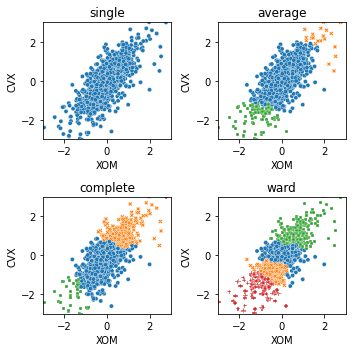

In [1209]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
for i, method in enumerate(['single', 'average', 'complete', 'ward']):
    ax = axes[i // 2, i % 2]
    Z = linkage(df, method=method)
    colors = [f'C{c+1}' for c in fcluster(Z, 4, criterion='maxclust')]
    ax = sns.scatterplot(x='XOM', y='CVX', hue=colors, style=colors,
                         size=0.5, ax=ax, data=df, legend=False)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(method)

plt.tight_layout()
plt.show()

## 13E - Gaussian Mixture Unsupervised Machine Learning Method

Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically.

In [1213]:
df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
mclust = GaussianMixture(n_components=2).fit(df)
print(mclust.bic(df)) #Bayesian Information Criteria (needs larger value)

4589.820626249873


The figure below displays how this method 'thinks.

There are two clusters: one cluster in the middle of the data and the sceond cluster in the outer edge of the data. This is very differnt than clusters from Kmeans and Hierarchial clustering. 

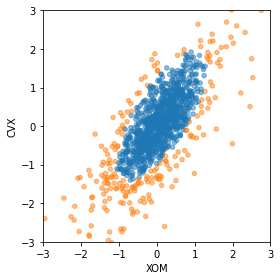

In [1222]:
fig, ax = plt.subplots(figsize=(4, 4))
colors = [f'C{c}' for c in mclust.predict(df)]
df.plot.scatter(x='XOM', y='CVX', c=colors, alpha=0.5, ax=ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plt.tight_layout()
plt.show()

In [1223]:
print('Mean')
print(mclust.means_)
print('Covariances')
print(mclust.covariances_)

Mean
[[ 0.07225117  0.10452744]
 [-0.05050178 -0.21237957]]
Covariances
[[[0.26868436 0.27606914]
  [0.27606914 0.51762673]]

 [[0.97385279 0.98028909]
  [0.98028909 1.67646834]]]


## 13F - Selecting the number of clusters

Similar to the elbow method

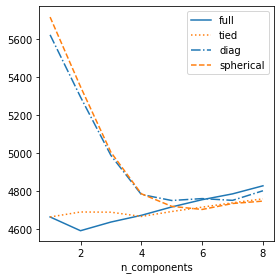

In [1225]:
results = []
covariance_types = ['full', 'tied', 'diag', 'spherical']
for n_components in range(1, 9):
    for covariance_type in covariance_types:
        mclust = GaussianMixture(n_components = n_components, warm_start=True,
                                 covariance_type = covariance_type)
        mclust.fit(df)
        results.append({
            'bic': mclust.bic(df),
            'n_components': n_components,
            'covariance_type': covariance_type,
        })
        
results = pd.DataFrame(results)

colors = ['C0', 'C1', 'C2', 'C3']
styles = ['C0-','C1:','C0-.', 'C1--']

fig, ax = plt.subplots(figsize=(4, 4))
for i, covariance_type in enumerate(covariance_types):
    subset = results.loc[results.covariance_type == covariance_type, :]
    subset.plot(x='n_components', y='bic', ax=ax, label=covariance_type, 
                kind='line', style=styles[i]) # , color=colors[i])

plt.tight_layout()
plt.show()

## 13G - Scaling and Categorical Variables

Variables with widely different units and magnitude will have issues with clustering methods as the Machine Learning methods will focus on the large values and ignore the variables with the small values. Not only are binary variables likely on a different scale from other data, but the fact that binary variables only have two values can prove problematic with techniques PCA and K-means.

Variables with very different scale and units need to be normalized appropriately before you apply a clustering procedure. 

In the example below, the variables annual_inc and revol_bal dominate the clusters, and the cluster have very different sizes. Cluster 3 has only 52 members with comparitively high income and credit balance.

In [361]:
"""Before Standardization/Normalization"""
loan_data = pd.read_csv(LOAN_DATA_CSV)
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)
defaults = loan_data.loc[loan_data['outcome'] == 'default',]

columns = ['loan_amnt', 'annual_inc', 'revol_bal', 'open_acc', 
           'dti', 'revol_util']

df = defaults[columns]
kmeans = KMeans(n_clusters=4, random_state=1).fit(df)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)
centers['size'] = [counts[i] for i in range(4)]
print(centers)

      loan_amnt     annual_inc     revol_bal   open_acc        dti  \
0  18275.132345   83354.634595  19635.189254  11.664373  16.774586   
1  21852.701005  165407.730318  38907.295645  12.597152  13.466876   
2  10591.893792   42453.058692  10268.048598   9.583820  17.713563   
3  22570.192308  489783.403846  85161.346154  13.326923   6.907500   

   revol_util   size  
0   62.258588   7543  
1   63.634900   1194  
2   58.111226  13882  
3   59.651923     52  


The clusters are now more balance after standardization.

In [362]:
"""After Standardization/Normalization"""
scaler = preprocessing.StandardScaler()
df0 = scaler.fit_transform(df * 1.0)

kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
counts = Counter(kmeans.labels_)

centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                       columns=columns)
centers['size'] = [counts[i] for i in range(4)]
print(centers)

      loan_amnt     annual_inc     revol_bal   open_acc        dti  \
0  10499.824632   51070.958451  11629.172535   7.511129  15.965747   
1  10315.255666   53468.181307   6032.616033   8.637385  11.255855   
2  25920.260952  116308.326663  32827.641428  12.389941  16.204021   
3  13420.700048   55844.852918  16370.832021  14.334512  24.189881   

   revol_util  size  
0   77.806693  7405  
1   31.000342  5339  
2   66.172004  3701  
3   59.227862  6226  


In [363]:
"""AFTER STANDARDIZATION"""
newloan = loan_data.loc[0:0, predictors]
X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)

X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
print(X.iloc[nbrs[1][0], :])

       borrower_score  payment_inc_ratio
37584            0.65            2.39368
40854            0.65            2.39035
33294            0.65            2.39710
37636            0.65            2.40189
41202            0.65            2.37888


## 13H - Dominant Variables

Even in cases wehre teh variables are measured on teh same scale and accurately reflect relative importance (e.g., movement of stock prices), it can sometimes be useful to rescale the variables.

In the example below, the plot reveals that the variances of teh first and second compoennts are much larger than the others. This often indicates that one ore two variables domoinate the loadings. 

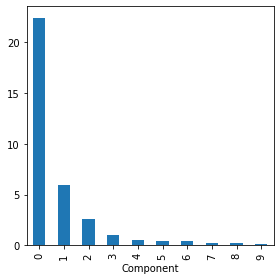

In [1240]:
syms = ['GOOGL', 'AMZN', 'AAPL', 'MSFT', 'CSCO', 'INTC', 'CVX', 'XOM', 
        'SLB', 'COP', 'JPM', 'WFC', 'USB', 'AXP', 'WMT', 'TGT', 'HD', 'COST']
top_sp1 = sp500_px.loc[sp500_px.index >= '2005-01-01', syms]

sp_pca1 = PCA()
sp_pca1.fit(top_sp1)

explained_variance = pd.DataFrame(sp_pca1.explained_variance_)
ax = explained_variance.head(10).plot.bar(legend=False, figsize=(4, 4))
ax.set_xlabel('Component')

plt.tight_layout()
plt.show()

The first two principal components are dominated by GOOGL and AMZN. To handle this situation, you can eitehr include them as is, rescale the variabels, or exclude the dominant varibles from the analysis and handle them separately. 

In [1244]:
loadings = pd.DataFrame(sp_pca1.components_[0:2, :], 
                        columns=top_sp1.columns)
print(loadings.transpose())

              0         1
GOOGL -0.857310  0.477873
AMZN  -0.444728 -0.874149
AAPL  -0.071627 -0.020802
MSFT  -0.036002 -0.006204
CSCO  -0.029205 -0.003045
INTC  -0.026666 -0.006069
CVX   -0.089548 -0.037420
XOM   -0.080336 -0.020511
SLB   -0.110218 -0.030356
COP   -0.057739 -0.024117
JPM   -0.071228 -0.009244
WFC   -0.053228 -0.008597
USB   -0.041670 -0.005952
AXP   -0.078907 -0.024027
WMT   -0.040346 -0.007141
TGT   -0.063659 -0.024662
HD    -0.051412 -0.032922
COST  -0.071403 -0.033826


## 13I - Problems with Clustering Mixed Data

Kmeans and PCA are most appropriate for continuous variables. You can always use the "one hot encoder" but in practice this can be difficult with Kmeans and PCA.

The binary variables only take the value 0/1 so the binary variables will dominate the entire data set. 

In [1249]:
df.head(3)

dti  payment_inc_ratio  pub_rec_zero  home__MORTGAGE  home__OWN  \
0   1.00             2.3932             1               0          0   
1   5.55             4.5717             1               0          1   
2  18.08             9.7160             1               0          0   

   home__RENT  
0           1  
1           0  
2           1

In [1248]:
columns = ['dti', 'payment_inc_ratio', 'home_', 'pub_rec_zero']
df = pd.get_dummies(defaults[columns])

scaler = preprocessing.StandardScaler()

df0 = scaler.fit_transform(df * 1.0)
kmeans = KMeans(n_clusters=4, random_state=1).fit(df0)
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                       columns=df.columns)
print(centers)

         dti  payment_inc_ratio  pub_rec_zero  home__MORTGAGE     home__OWN  \
0  16.992128           9.105395  1.000000e+00   -1.110223e-16 -3.330669e-16   
1  17.456244           8.422914  1.000000e+00    1.000000e+00 -6.938894e-17   
2  16.504955           8.064247 -4.440892e-16    5.156600e-01 -1.804112e-16   
3  17.197993           9.266666  9.179025e-01    9.436896e-16  1.000000e+00   

     home__RENT  
0  1.000000e+00  
1 -2.997602e-15  
2  4.843400e-01  
3 -6.661338e-16  


#  SUMMARY

## FUNCTIONS
`import pandas as pd`

    MEAN:          .mean()
    MEDIAN:        .median()
    STD DEV:       .std()
    PERCENTILE:    .quantile(0.25) 25% percentile
    WEIGHTED MEAN: np.average(__column1__, weights= __column2__) mean weighted by a variable
    TRIM MEAN:     trim_mean(__column__, 0.1) trims the 10% percentile from each side of the mean
    CORRELATION;   df.corr()
    SAMPLE:        sample()
    RESAMPLE:      resample(, replace ==True)
    DUMMIES:       pd.get_dummies(house['PropertyType']).head(6))

## PLOTS
`import seaborn as sns`

`import matplotlib.pylab as plt`

`from scipy import stats`

    BOXPLOT: ax = (state['Population']).plot.box(figsize=(3, 4))
    BOXPLOT MULTI: ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',figsize=(5, 5))
    HISTOGRAM: ax = (state['Population']).plot.hist(figsize=(4, 4))
               ax = results.plot.hist(bins=30, figsize=(4, 3))
    DENSITY: ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], bins=range(1,12), figsize=(4, 4))
    BAR CHART: ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
    SCATTER: ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')
    HEXBIN: ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5, 4))
    DISTRIBUTION PLOT: stats.probplot(norm_sample, plot=ax) #Visual display to confirm normal/long distribution
    HEAT MAP:  fig, ax = plt.subplots(figsize=(5, 4))
    
               ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)



    FREQUENCY TABLE: binnedPopulation = pd.cut(state['Population'], 10)
                     print(binnedPopulation.value_counts())
                     
    PIVOT TABLE: crosstab = lc_loans.pivot_table(index='grade', columns='status',aggfunc=lambda x: len(x), margins=True)
    
## SHORTCUTS

 __BINOMIAL CALCULATOR__ _If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200_ clicks:
 
`from scipy import stats`

        PROBABILITY: print(stats.binom.pmf(0, n=200, p=0.02))

        CUMULATIVE PROBABILITY: print(stats.binom.cdf(2, n=5, p=0.1))
    
__POISSON DISTRUBTION__:

`from scipy import stats`

        sample = stats.poisson.rvs(2, size=100)
        
__EXPONENTIAL DISTRBUTION__: 

`from scipy import stats`

         sample = stats.expon.rvs(scale=1/0.2, size=100) #module uses inverse rates. so if the rate is 0.2 then it has a 5 
         value.
         
         sample = stats.expon.rvs(scale=5, size=100)
         
__TWO SAMPLE T-TEST__:

`from scipy import stats`

         Chi-Squared:
            survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])
            chi2, p_value, df, _ = stats.chi2_contingency(survivors)

            print(f'p-value for single sided test: {p_value / 2:.4f}')

         Stats Method 1:
            res = stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                                  session_times[session_times.Page == 'Page B'].Time,
                                  equal_var=False)
            print(f'p-value for single sided test: {res.pvalue / 2:.4f}') #Convert two-tailed to one-way by dividing by 2.

         Stats Method 2:
            tstat, pvalue, df = sm.stats.ttest_ind(session_times[session_times.Page == 'Page A'].Time, 
                                                   session_times[session_times.Page == 'Page B'].Time,
                                                   usevar='unequal', alternative='smaller')
            print(f'p-value: {pvalue:.4f}')
            
__ANOVA__:

`import statsmodels.formula.api as smf`

`from scipy import stats`

        model = smf.ols('Time ~ Page', data=four_sessions).fit() #'(OUTCOME) ~ (CATAGORIES)'               
        aov_table = sm.stats.anova_lm(model)
        print(aov_table)
        
__POWER AND SAMPLE SIZE__:

`from scipy import stats`

`import statsmodels.api as sm`

        #Important in determining Sample size.
        effect_size = sm.stats.proportion_effectsize(0.0121, 0.011) #You want to detect difference from 0.011 to 0.0121
        analysis = sm.stats.TTestIndPower()
        result = analysis.solve_power(effect_size=effect_size, alpha=0.05, power=0.8, alternative='larger')
        print('Sample Size: %.3f' % result)
 
 ## REGRESSION AND PREDICTIONS
 
 __LINEAR REGRESSION__:
 
`from sklearn.linear_model import LinearRegression`
        
        Simple LR:
            model = LinearRegression()
            model.fit(lung[predictors], lung[outcome])
            model.predict(lung[predictors], lung[outcome])
        
        Weighted LR:
            house_wt = LinearRegression()
            house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)
        
## MODEL ASSESSMENTS 

__R2 & RSME__ _- An R2 value of 1 suggests the predictions perfectly fit the data.
A RMSE value of 0 suggests there is no error in the predictions:_

`from sklearn.metrics import r2_score, mean_squared_error`

        fitted = house_lm.predict(house[predictors])
        RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
        r2 = r2_score(house[outcome], fitted)
        print(f'RMSE: {RMSE:.0f}')
        print(f'r2: {r2:.4f}')

__OLS LR RESULTS__:

`import statsmodels.api as sm`
            
        model = sm.OLS(house[outcome], house[predictors].assign(const=1))
        results = model.fit()
        print(results.summary())
        
__OLS POLY RESULTS__:

`import statsmodels.formula.api as smf`

        model_poly = smf.ols(formula='AdjSalePrice ~  SqFtTotLiving + np.power(SqFtTotLiving, 2) + ' + 
                'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
        result_poly = model_poly.fit()
        print(result_poly.summary())
            
__OLS SPLINE RESULTS__:

`import statsmodels.formula.api as smf`

        formula = ('AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 
        'SqFtLot + Bathrooms + Bedrooms + BldgGrade')
        model_spline = smf.ols(formula=formula, data=house_98105)
        result_spline = model_spline.fit()
        print(result_spline.summary())
        
__CONFUSION MATRIX METHOD 1__:

`from sklearn.metrics import confusion_matrix, precision_recall_fscore_support`

            print(confusion_matrix(y, logit_reg.predict(X)))
            
__CONFUSION MATRIX METHOD 2__:

`from dmba import classificationSummary`

            classificationSummary(y, logit_reg.predict(X), 
                      class_names=logit_reg.classes_)
        
__ROC CURVE__:

`from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score`

            fpr, tpr, thresholds = roc_curve(y, logit_reg.predict_proba(X)[:, 0], 
                                     pos_label='default')
            roc_df = pd.DataFrame({'recall': tpr, 'specificity': 1 - fpr})
            ax = roc_df.plot(x='specificity', y='recall', figsize=(4, 4), legend=False)
            
__TEST TRAIN SPLIT__:

`from sklearn.model_selection import train_test_split` 

           train_X, test_X, train_y, test_y = train_test_split(X, y)

## TUNING

__SMOTE__ _- an oversampling method that generates synthetic samples for minority classes, balancing the dataset and improving classification accuracy. Finds the n-nearest neighbors in the minority class for each of the samples in the class . Then it draws a line between the the neighbors an generates random points on the lines:_

`from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE`

        X_resampled, y_resampled = SMOTE().fit_resample(X, y)
        
__ADASYN__ _- an oversampling method that generates synthetic samples for minority classes, balancing the dataset and improving classification accuracy.Same as SMOTE but random points are added to include variability to make points more realistic:_

`from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE`

        X_resampled, y_resampled = ADASYN().fit_resample(X, y)


__ADDING WEIGHT__:

        default_wt = 1 / np.mean(full_train_set.outcome == 'default')
        wt = [default_wt if outcome == 'default' else 1 for outcome in full_train_set.outcome]

        full_model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
        full_model.fit(X, y, wt)
        
__GET DUMMES__ _- Converts predictive features from catagorical to binary_:

`import pandas as pd`

        X = pd.get_dummies(house[predictors], drop_first=True, dtype=int) #Convert predictors to binary values.

__STANDARDIZATION__ _- puts all variables on similar scales by subtracting the mean and dividing by the standard deviation:_

`from sklearn import preprocessing`

        scaler = preprocessing.StandardScaler()
        scaler.fit(X * 1.0)

        X_std = scaler.transform(X * 1.0)
        newloan_std = scaler.transform(newloan * 1.0)

        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_std, y)
        
__INFLUENTIAL VALUES_:

        ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
        result_infl = ols_infl.fit()


## CLASSIFICATION METHODS

__NAIVE BAYES__ _- (ONLY WORKS WITH BINARY VARIABLES) assumes that the features we use to predict the target are independent and do not affect each other. While in real-life data, features depend on each other in determining the target, but this is ignored by the Naive Bayes classifier.:_

`from sklearn.naive_bayes import MultinomialNB`

        #convert to categorical
        loan_data.outcome = loan_data.outcome.astype('category')
        loan_data.outcome.cat.reorder_categories(['paid off', 'default'])
        loan_data.purpose_ = loan_data.purpose_.astype('category')
        loan_data.home_ = loan_data.home_.astype('category')
        loan_data.emp_len_ = loan_data.emp_len_.astype('category')

        predictors = ['purpose_', 'home_', 'emp_len_']
        outcome = 'outcome'
        X = pd.get_dummies(loan_data[predictors], prefix='', prefix_sep='', dtype=int)
        y = loan_data[outcome]

        naive_model = MultinomialNB(alpha=0.01, fit_prior=True)
        #naive_model = MultinomialNB(alpha=1e-10, fit_prior=False)
        naive_model.fit(X, y)

 __LINEAR DISCRIMINANT ANALYSIS (LDA)__ _- a method used in statistics and other fields, to find a linear combination of features that characterizes or separates two or more classes of objects or events._ (Same theory as Support Vector Machines): 
 
`from sklearn.discriminant_analysis import LinearDiscriminantAnalysis`
 
        loan_lda = LinearDiscriminantAnalysis()
        loan_lda.fit(X, y)
        
__LOGISTIC REGRESSION__ _- mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class._:

`from sklearn.linear_model import LogisticRegression`

        """penalty and C are used to prevent overfitting. We set pentalty and C to large values to prevent regularization"""
        logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
        logit_reg.fit(X, y)
        
        #Assigns the numerical catagories starting from 0.
        from sklearn.preprocessing import OrdinalEncoder
        enc = OrdinalEncoder(categories=[['paid off', 'default']])
        y_enc = enc.fit_transform(loan_data[[outcome]]).ravel()

        logit_reg_enc = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
        logit_reg_enc.fit(X, y_enc)

# Statistical Machine Learning

__K-NEAREST NEIGHBORS__ _- uses proximity to make classifications or predictions about the grouping of an individual data point. K typically is between 1-20, often odd numer is chosen to avoid ties. The smaller the signal-to-noise ratio, the higher the required K.:_

`from sklearn.neighbors import KNeighborsClassifier`

        knn = KNeighborsClassifier(n_neighbors=20)
        knn.fit(X, y)
        
__DECISION TREE__ _- tree model is a set of "if-then-else" rules that are easy to understand and to implement:_

`from sklearn.tree import DecisionTreeClassifier`

        loan_tree = DecisionTreeClassifier(random_state=1, criterion='entropy',
                                           min_impurity_decrease=0.003)
        loan_tree.fit(X, y)

__RANDOM FOREST__ - n_estimators are the quanity of trees to be built:

`from sklearn.ensemble import RandomForestClassifier`

        rf = RandomForestClassifier(n_estimators=500, random_state=1, 
                                    oob_score=True)
        rf.fit(X, y)
        
__XGBOOST__ -_an implementation of gradient-boosting decision trees. It has been used by data scientists and researchers worldwide to optimize their machine-learning models_:

`from xgboost import XGBClassifier`

        xgb = XGBClassifier(objective='binary:logistic', subsample=.63, 
                            use_label_encoder=False, eval_metric='error')
        print(xgb.fit(X, y))

# Unsupervised Machine Learning

__PRINCIPAL COMPONENT ANALYSIS (PCA)__ _-Often, variables will vary together (covary), and some of the variation in one is actually duplicated in another (for example, restaurant checks and tips). PCA is a technique to discover the way in which numberic variables covary.This is not a predictive model, it is used to understand the most important features. CANNOT BE USED WITH CATAGORICAL DATA:

`from sklearn.decomposition import PCA`

        pcs = PCA(n_components=2) NOTE: # components cannot exceed # of features
        pcs.fit(oil_px) NOTE: There is no 'y-value' because there is no distinction in unsupervised learning.

__CORRESPONDANCE ANALYSIS__ _-PCA cannot be used for categorical data; however, a somewhat related technique is correspondance analysis. The goal is to recognize the associations between categories, or between categorical features. This analysis is mainly used for graphical analysis. The main value of this analysis to to graphically display variables that are associated with one another by the proximity of the plot:_

`import prince`

        ca = prince.CA(n_components=2)
        ca = ca.fit(housetasks)

__K-Means Clustering__ _-a technique to divide data into different groups, where the records in each group are similar to one another. A goal of clustering is to identify significant meaningful groups of data. The groups can be used directly, analyzed in more depth, or passed as a feature or an outcome to a predictive regression or classification model.NOTE: You must know in advance an inclination of the clusters:

`from sklearn.cluster import KMeans`

        df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
        kmeans = KMeans(n_clusters=4).fit(df)
        
__Hierarchical clustering__ _-an algorithm that groups similar objects into groups called clusters:_

`from scipy.cluster.hierarchy import linkage, dendrogram, fcluster`

        Z = linkage(df, method='complete')

__Gaussian Mixture__ _-Gaussian mixture models are a probabilistic model for representing normally distributed subpopulations within an overall population. Mixture models in general don't require knowing which subpopulation a data point belongs to, allowing the model to learn the subpopulations automatically:_

`from sklearn.mixture import GaussianMixture`

        df = sp500_px.loc[sp500_px.index >= '2011-01-01', ['XOM', 'CVX']]
        mclust = GaussianMixture(n_components=2).fit(df)
